In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.feature_selection import RFE

In [2]:
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data cleaning and Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Missing values

In [5]:
# Finding the percentage of missing values
print(round(df.isnull().sum()/len(df.index)*100,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

If we refer to the data dictionary, we come to know that some variables where we are observing high % of missing values are not really missing values. There is some meaning for them. \
For eg. missing values under `Alley` represents `No alley access`. Similarly we do for other features and impute missing values

In [6]:
df['Alley'] = df['Alley'].fillna('No alley access')

df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')

df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')

df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['Fence'] = df['Fence'].fillna('No Fence')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [7]:
# Again checking the % of missing values
print(round(df.isnull().sum()/len(df.index)*100,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Imputing missing `GarageYrBlt` values by the median

In [8]:
garage_med = df['GarageYrBlt'].describe()['50%']

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(garage_med)

`MasVnrType` and `MasVnrArea` have very less % of missing value. So we will drop the rows having missing value of these features

In [9]:
df = df[~(df['MasVnrType'].isnull() & df['MasVnrArea'].isnull())]

# checking the missing values 
print(round(df.isnull().sum()/len(df.index)*100,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.70
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Now we are left with `LotFrontage` the only feature (numeric type) having missing values.\
Let's see its distribution of values to know if there are outliers

In [10]:
df['LotFrontage'].describe()

count    1195.000000
mean       70.030126
std        24.289276
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

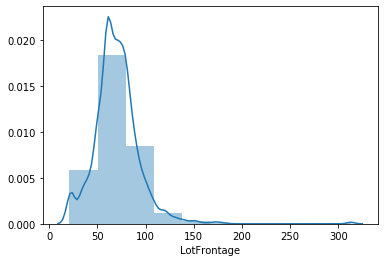

In [11]:
sns.distplot(df['LotFrontage'], bins=10)
plt.show()

The plot is positively skewed as there are few values on its right tail. Hence to be on the safer side, we will impute the missing values by the median of the distribution

In [12]:
lot_med = df['LotFrontage'].describe()['50%']
df['LotFrontage'] = df['LotFrontage'].fillna(lot_med)

print(df['LotFrontage'].isnull().sum())

0


In [13]:
# Finding the percentage of missing values
print(round(df.isnull().sum()/len(df.index)*100,2))

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

In [14]:
# Remove the Id column as it is redundant
df = df.drop('Id', axis=1)

In [15]:
# Dropping the missing observations which have missing value under Electrical column
df = df[~df['Electrical'].isnull()]

# Finding the percentage of missing values
print(round(df.isnull().sum()/len(df.index)*100,2))

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [16]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,69.845624,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.445210,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,42.350366,22.044429,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,23.989371,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Actually, if we look at the data dictionary; `MSSubClass`, `OverallQual` and `OverallCond` are actually categorical variables. We will map them with their respective values as follows: 

In [17]:
# Mapping MSSubClass
ms_subclass = {20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER',
              40:'1-STORY W/FINISHED ATTIC ALL AGES', 45:'1-1/2 STORY - UNFINISHED ALL AGES',
              50:'1-1/2 STORY FINISHED ALL AGES', 60:'2-STORY 1946 & NEWER',
              70:'2-STORY 1945 & OLDER', 75:'2-1/2 STORY ALL AGES',
              80:'SPLIT OR MULTI-LEVEL', 85:'SPLIT FOYER', 90:'DUPLEX - ALL STYLES AND AGES',
              120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 150:'1-1/2 STORY PUD - ALL AGES',
              160:'2-STORY PUD - 1946 & NEWER', 180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
              190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

df['MSSubClass'] = df['MSSubClass'].map(ms_subclass)

# Mapping OverallQual
ratings = {10:'Very Excellent', 9:'Excellent', 8:'Very Good', 7:'Good', 6:'Above Average',
               5:'Average', 4:'Below Average', 3:'Fair', 2:'Poor', 1:'Very Poor'}

df['OverallQual'] = df['OverallQual'].map(ratings)

# Mapping OverallCond
df['OverallCond'] = df['OverallCond'].map(ratings)

In [18]:
df['MSSubClass'].describe()

count                                1451
unique                                 15
top       1-STORY 1946 & NEWER ALL STYLES
freq                                  532
Name: MSSubClass, dtype: object

In [19]:
df['OverallQual'].describe()

count        1451
unique         10
top       Average
freq          396
Name: OverallQual, dtype: object

In [20]:
df['OverallCond'].describe()

count        1451
unique          9
top       Average
freq          814
Name: OverallCond, dtype: object

In [21]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,69.845624,10507.808408,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.445210,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,22.044429,9992.987081,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,23.989371,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,21.000000,1300.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7537.500000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,69.000000,9477.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,79.000000,11600.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1451 non-null object
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null object
OverallCond      1451 non-null object
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451

In [23]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [24]:
# converting to integer type
df['MoSold'] = df['MoSold'].astype('int')
df['YrSold'] = df['YrSold'].astype('int')

# Mapping MoSold variable to the respective months
months = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',
         8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

df['MoSold'] = df['MoSold'].map(months)

In [25]:
df['MoSold'].describe()

count     1451
unique      12
top       June
freq       253
Name: MoSold, dtype: object

In [26]:
# Numerical variables
num_vars = df.select_dtypes(exclude='object')
num_vars = num_vars.columns.to_list()

# categorical variables
cat_vars = df.select_dtypes(include='object')
cat_vars = cat_vars.columns.to_list()

print('Numerical variables are: {}\n'.format(num_vars))

print('Categorical variables are: {}'.format(cat_vars))

Numerical variables are: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']

Categorical variables are: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu'

In [27]:
print('no. of numeric variables are: {}'.format(len(num_vars)))
print('no. of categorical variables are: {}'.format(len(cat_vars)))

no. of numeric variables are: 33
no. of categorical variables are: 47


In [28]:
df['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          532
2-STORY 1946 & NEWER                                     296
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     86
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      57
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

Some categories have very less entries as compared to total no of rows in the dataset.\
We will consider all the remaining categories within `MSSubClass` as 'other class' and only consider top 3 categories.

In [29]:
subclass_cate = df['MSSubClass'].value_counts().index.to_list()[3:]

df['MSSubClass'] = df['MSSubClass'].apply(lambda x: 'other class' if x in subclass_cate else x)

In [30]:
df['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES    532
other class                        479
2-STORY 1946 & NEWER               296
1-1/2 STORY FINISHED ALL AGES      144
Name: MSSubClass, dtype: int64

In [31]:
df['MSZoning'].value_counts()

RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64

* FV, RH, C(all) have very less no of values. If we keep all the categories then we will get more no of dummy variables from this `MSZoning` column

In [32]:
zoning_cate = df['MSZoning'].value_counts().index.to_list()[2:]

df['MSZoning'] = df['MSZoning'].apply(lambda x: 'other zone' if x in zoning_cate else x)

df['MSZoning'].value_counts()

RL            1145
RM             218
other zone      88
Name: MSZoning, dtype: int64

In [33]:
df['Street'].value_counts()

Pave    1445
Grvl       6
Name: Street, dtype: int64

As we can see here, that almost all houses have Paved road. So we will drop the `Street` column

In [34]:
df = df.drop('Street', axis=1)

In [35]:
df['Alley'].value_counts()

No alley access    1361
Grvl                 50
Pave                 40
Name: Alley, dtype: int64

In [36]:
df['LotShape'].value_counts()

Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [37]:
df['LandContour'].value_counts()

Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [38]:
df['Utilities'].value_counts()

AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64

All houses have all public utilities. We can drop this column as it will not give distinctive information about target variable

In [39]:
df = df.drop('Utilities', axis=1)

In [40]:
df['LotConfig'].value_counts()

Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Lot configuration has some categories which are very less in quantity. So we will group them together as "other configuration" 

In [41]:
lot_config = df['LotConfig'].value_counts().index.to_list()[2:]

df['LotConfig'] = df['LotConfig'].apply(lambda x: 'other configuration' if x in lot_config else x)

df['LotConfig'].value_counts()

Inside                 1045
Corner                  262
other configuration     144
Name: LotConfig, dtype: int64

In [42]:
df['LandSlope'].value_counts()

Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [43]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
BrkSide     58
SawyerW     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

As it can be seen that `Neighbourhood` has a lot of categories so it will create more dummy variables. There are total 25 neighbourhoods, we will consider top 15 and rest will be grouped as "other neighbour"

In [44]:
nbd = df['Neighborhood'].value_counts().index.to_list()[15:]

df['Neighborhood'] = df['Neighborhood'].apply(lambda x: 'other neighbour' if x in nbd else x)

df['Neighborhood'].value_counts()

NAmes              225
other neighbour    187
CollgCr            149
OldTown            113
Edwards            100
Somerst             83
Gilbert             78
NridgHt             76
Sawyer              74
NWAmes              73
SawyerW             58
BrkSide             58
Crawfor             50
Mitchel             49
NoRidge             41
IDOTRR              37
Name: Neighborhood, dtype: int64

In [45]:
df['Condition1'].value_counts()

Norm      1251
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Considering top 3 categories within `Condition1` column and grouping rest as "Misc condition"

In [46]:
cond = df['Condition1'].value_counts().index.to_list()[3:]

df['Condition1'] = df['Condition1'].apply(lambda x: 'misc condition' if x in cond else x)

df['Condition1'].value_counts()

Norm              1251
Feedr               81
misc condition      71
Artery              48
Name: Condition1, dtype: int64

In [47]:
df['Condition2'].value_counts()

Norm      1436
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

As almost all the values belong to "Norm" category, we will drop this column

In [48]:
df = df.drop('Condition2', axis=1)

In [49]:
df['BldgType'].value_counts()

1Fam      1212
TwnhsE     113
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [50]:
df['HouseStyle'].value_counts()

1Story    721
2Story    442
1.5Fin    154
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Considering top 3 categories and grouping all other into single category

In [51]:
hstyle = df['HouseStyle'].value_counts().index.to_list()[3:]

df['HouseStyle'] = df['HouseStyle'].apply(lambda x: 'misc style' if x in hstyle else x)

df['HouseStyle'].value_counts()

1Story        721
2Story        442
1.5Fin        154
misc style    134
Name: HouseStyle, dtype: int64

In [52]:
df['OverallQual'].value_counts()

Average           396
Above Average     372
Good              315
Very Good         167
Below Average     116
Excellent          43
Fair               20
Very Excellent     17
Poor                3
Very Poor           2
Name: OverallQual, dtype: int64

In [53]:
df['OverallCond'].value_counts()

Average          814
Above Average    251
Good             205
Very Good         72
Below Average     57
Fair              24
Excellent         22
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64

From above to summaries, we observe that there are very few houses that have quality and condition rating as "Poor", "Very Poor", "Excellent", "Very Excellent". Hence we will remove the rows that have following categories of house rating 

In [54]:
overall_qual = df['OverallQual'].value_counts().index.to_list()[7:]
overall_cond = df['OverallCond'].value_counts().index.to_list()[5:]

In [55]:
df = df[~df['OverallQual'].isin(overall_qual)]
df['OverallQual'].value_counts()

Average          396
Above Average    372
Good             315
Very Good        167
Below Average    116
Excellent         43
Fair              20
Name: OverallQual, dtype: int64

In [56]:
# total rows/entries
len(df.index)

1429

In [57]:
df = df[~df['OverallCond'].isin(overall_cond)]
df['OverallCond'].value_counts()

Average          799
Above Average    250
Good             205
Very Good         72
Below Average     57
Name: OverallCond, dtype: int64

In [58]:
# total entries
len(df.index)

1383

In [59]:
df['RoofStyle'].value_counts()

Gable      1090
Hip         264
Flat         12
Gambrel       8
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

Considering top2 styles and grouping others

In [60]:
rstyle = df['RoofStyle'].value_counts().index.to_list()[2:]

df['RoofStyle'] = df['RoofStyle'].apply(lambda x: 'other' if x in rstyle else x)
df['RoofStyle'].value_counts()

Gable    1090
Hip       264
other      29
Name: RoofStyle, dtype: int64

In [61]:
df['RoofMatl'].value_counts()

CompShg    1361
Tar&Grv      10
WdShake       5
WdShngl       4
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

Dropping `RoofMatl`

In [62]:
df = df.drop('RoofMatl', axis=1)

In [63]:
df['Exterior1st'].value_counts()

VinylSd    494
HdBoard    217
MetalSd    214
Wd Sdng    187
Plywood    106
CemntBd     50
BrkFace     49
WdShing     24
Stucco      21
AsbShng     16
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

Considering top 7 categories and grouping all other categories

In [64]:
ext = df['Exterior1st'].value_counts().index.to_list()[7:]

df['Exterior1st'] = df['Exterior1st'].apply(lambda x: 'other' if x in ext else x)
df['Exterior1st'].value_counts()

VinylSd    494
HdBoard    217
MetalSd    214
Wd Sdng    187
Plywood    106
other       66
CemntBd     50
BrkFace     49
Name: Exterior1st, dtype: int64

In [65]:
df['Exterior2nd'].value_counts()

VinylSd    482
MetalSd    208
HdBoard    202
Wd Sdng    185
Plywood    135
CmentBd     49
Wd Shng     37
BrkFace     24
Stucco      21
AsbShng     17
ImStucc      9
Brk Cmn      5
Stone        4
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

Considering top 6 categories and grouping others

In [66]:
ext2 = df['Exterior2nd'].value_counts().index.to_list()[6:]
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'other' if x in ext2 else x)
df['Exterior2nd'].value_counts()

VinylSd    482
MetalSd    208
HdBoard    202
Wd Sdng    185
Plywood    135
other      122
CmentBd     49
Name: Exterior2nd, dtype: int64

In [67]:
df['MasVnrType'].value_counts()

None       821
BrkFace    429
Stone      119
BrkCmn      14
Name: MasVnrType, dtype: int64

In [68]:
df['ExterQual'].value_counts()

TA    870
Gd    469
Ex     34
Fa     10
Name: ExterQual, dtype: int64

In [69]:
df['ExterCond'].value_counts()

TA    1233
Gd     130
Fa      20
Name: ExterCond, dtype: int64

In [70]:
df['Foundation'].value_counts()

PConc     619
CBlock    607
BrkTil    129
Slab       20
Stone       5
Wood        3
Name: Foundation, dtype: int64

Consider top 3 foundations

In [71]:
foundation = df['Foundation'].value_counts().index.to_list()[3:]
df['Foundation'] = df['Foundation'].apply(lambda x: 'other' if x in foundation else x)
df['Foundation'].value_counts()

PConc     619
CBlock    607
BrkTil    129
other      28
Name: Foundation, dtype: int64

In [72]:
df['BsmtQual'].value_counts()

TA             612
Gd             604
Ex             104
No Basement     33
Fa              30
Name: BsmtQual, dtype: int64

In [73]:
df['BsmtExposure'].value_counts()

No             904
Av             213
Gd             121
Mn             111
No Basement     34
Name: BsmtExposure, dtype: int64

In [74]:
df['BsmtFinType1'].value_counts()

Unf            407
GLQ            391
ALQ            212
BLQ            142
Rec            126
LwQ             72
No Basement     33
Name: BsmtFinType1, dtype: int64

In [75]:
df['BsmtFinType2'].value_counts()

Unf            1188
Rec              53
LwQ              46
No Basement      34
BLQ              31
ALQ              17
GLQ              14
Name: BsmtFinType2, dtype: int64

Dropping `BsmtFinType2` as 86% of observations have Unf category

In [76]:
df = df.drop('BsmtFinType2', axis=1)

In [77]:
df['Heating'].value_counts()

GasA     1355
GasW       16
Grav        6
Wall        3
OthW        2
Floor       1
Name: Heating, dtype: int64

Drop the `Heating` column

In [78]:
df = df.drop('Heating', axis=1)

In [79]:
df['HeatingQC'].value_counts()

Ex    700
TA    409
Gd    229
Fa     44
Po      1
Name: HeatingQC, dtype: int64

Merging Poor into Fair category

In [80]:
heatqc = df['HeatingQC'].value_counts().index.to_list()[3:]
df['HeatingQC'] = df['HeatingQC'].apply(lambda x: 'Fa' if x in heatqc else x)
df['HeatingQC'].value_counts()

Ex    700
TA    409
Gd    229
Fa     45
Name: HeatingQC, dtype: int64

In [81]:
df['CentralAir'].value_counts()

Y    1302
N      81
Name: CentralAir, dtype: int64

In [82]:
df['CentralAir'] = df['CentralAir'].map(lambda x: 1 if x=='Y' else 0)
df['CentralAir'].value_counts()

1    1302
0      81
Name: CentralAir, dtype: int64

In [83]:
df['Electrical'].value_counts()

SBrkr    1273
FuseA      86
FuseF      21
FuseP       3
Name: Electrical, dtype: int64

Drop the `Electrical` column as 92% observations have "SBrKr" value 

In [84]:
df = df.drop('Electrical', axis=1)

In [85]:
df['KitchenQual'].value_counts()

TA    708
Gd    560
Ex     83
Fa     32
Name: KitchenQual, dtype: int64

In [86]:
df['Functional'].value_counts()

Typ     1295
Min2      32
Min1      30
Maj1      11
Mod       11
Maj2       3
Sev        1
Name: Functional, dtype: int64

Drop the `Functional` column

In [87]:
df = df.drop('Functional', axis=1)

In [88]:
df['FireplaceQu'].value_counts()

No Fireplace    654
Gd              360
TA              301
Fa               33
Po               18
Ex               17
Name: FireplaceQu, dtype: int64

In [89]:
df['GarageType'].value_counts()

Attchd       835
Detchd       367
BuiltIn       80
No Garage     70
Basment       17
CarPort        9
2Types         5
Name: GarageType, dtype: int64

Considering top 4 categories only

In [90]:
garage = df['GarageType'].value_counts().index.to_list()[4:]
df['GarageType'] = df['GarageType'].apply(lambda x: 'other' if x in garage else x)
df['GarageType'].value_counts()

Attchd       835
Detchd       367
BuiltIn       80
No Garage     70
other         31
Name: GarageType, dtype: int64

In [91]:
df['GarageFinish'].value_counts()

Unf          574
RFn          410
Fin          329
No Garage     70
Name: GarageFinish, dtype: int64

In [92]:
df['GarageQual'].value_counts()

TA           1250
No Garage      70
Fa             46
Gd             13
Ex              2
Po              2
Name: GarageQual, dtype: int64

Almost all the houses have 'Typical' garage. So we will drop this column

In [93]:
df = df.drop('GarageQual', axis=1)

In [94]:
df['GarageCond'].value_counts()

TA           1265
No Garage      70
Fa             31
Gd              9
Po              6
Ex              2
Name: GarageCond, dtype: int64

Drop this column

In [95]:
df = df.drop('GarageCond', axis=1)

In [96]:
df['PavedDrive'].value_counts()

Y    1280
N      75
P      28
Name: PavedDrive, dtype: int64

Dropping this column

In [97]:
df = df.drop('PavedDrive', axis=1)

In [98]:
df['PoolQC'].value_counts()

No Pool    1378
Fa            2
Gd            2
Ex            1
Name: PoolQC, dtype: int64

Drop this column

In [99]:
df = df.drop('PoolQC', axis=1)

In [100]:
df['Fence'].value_counts()

No Fence    1117
MnPrv        148
GdPrv         56
GdWo          51
MnWw          11
Name: Fence, dtype: int64

In [101]:
df['MiscFeature'].value_counts()

None    1331
Shed      47
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

Dropping this column

In [102]:
df = df.drop('MiscFeature', axis=1)

In [103]:
df['SaleType'].value_counts()

WD       1207
New       112
COD        40
ConLD       8
CWD         4
ConLw       4
ConLI       4
Oth         2
Con         2
Name: SaleType, dtype: int64

Considering top 2 sale types and grouping all others into single category

In [104]:
saletype = df['SaleType'].value_counts().index.to_list()[2:]
df['SaleType'] = df['SaleType'].apply(lambda x: 'other' if x in saletype else x)
df['SaleType'].value_counts()

WD       1207
New       112
other      64
Name: SaleType, dtype: int64

In [105]:
df['SaleCondition'].value_counts()

Normal     1142
Partial     115
Abnorml      92
Family       20
Alloca       11
AdjLand       3
Name: SaleCondition, dtype: int64

Considering top 2 sale types and grouping all others into single category

In [106]:
sale_cond = df['SaleCondition'].value_counts().index.to_list()[2:]
df['SaleCondition'] = df['SaleCondition'].apply(lambda x: 'other' if x in sale_cond else x)
df['SaleCondition'].value_counts()

Normal     1142
other       126
Partial     115
Name: SaleCondition, dtype: int64

In [107]:
# categorical variables
cat_vars = df.select_dtypes(include='object')
cat_vars = cat_vars.columns.to_list()

In [108]:
print(cat_vars)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold', 'SaleType', 'SaleCondition']


In [109]:
# Mapping other categories as well
zoning = {"RL":"Residential Low Density","RM":"Residential Medium Density",'other zone':'other zone'}
df['MSZoning'] = df['MSZoning'].map(zoning)

alley = {'Grvl':"Gravel", "Pave":"Paved", "No alley access":"No alley access"}
df['Alley'] = df['Alley'].map(alley)

lotshape = {'Reg':'Regular','IR1':'Slightly irregular','IR2':'Moderately Irregular','IR3':'Irregular'}
df['LotShape'] = df['LotShape'].map(lotshape)

landcontour = {'Lvl':'Near Level','Bnk':'Banked','HLS':'Hillside','Low':'Depression'}
df['LandContour'] = df['LandContour'].map(landcontour)

lotconfig = {'Inside':'Inside lot','Corner':'Corner lot','other configuration':'other configuration'}
df['LotConfig'] = df['LotConfig'].map(lotconfig)

lslope = {'Gtl':'Gentle slope','Mod':'Moderate Slope','Sev':'Severe Slope'}
df['LandSlope'] = df['LandSlope'].map(lslope)

nbdh = {'BrkSide':'Brookside',
       'ClearCr':'Clear Creek','CollgCr':'College Creek','Crawfor':'Crawford','Edwards':'Edwards','Gilbert':"Gilbert",
       'IDOTRR':'Iowa DOT and Rail Road','Mitchel':'Mitchell','NAmes':'North Ames',
       'NoRidge':'Northridge','NridgHt':'Northridge Heights','NWAmes':'Northwest Ames',
       'OldTown':'Old Town','Sawyer':'Sawyer','SawyerW':'Sawyer West',
       'Somerst':'Somerset'}
df['Neighborhood'] = df['Neighborhood'].map(nbdh)

cond1 = {'Artery':'Adjacent to arterial street','Feedr':'Adjacent to feeder street','Norm':'Normal',
        'misc condition':'misc condition'}

df['Condition1'] = df['Condition1'].map(cond1)

bltype = {'1Fam':'Single-family Detached','2FmCon':'Two-family Conversion; originally built as one-family dwelling',
         'Duplx':'Duplex','TwnhsE':'Townhouse End Unit','TwnhsI':'Townhouse Inside Unit'}
df['BldgType'] = df['BldgType'].map(bltype)

hstyle = {'1Story':'One story','1.5Fin':'One and one-half story: 2nd level finished',
         '2Story':'Two story','misc style':'misc style'}
df['HouseStyle'] = df['HouseStyle'].map(hstyle)

rfstyle = {'Gable':'Gable','Hip':"Hip",'other':'other'}
df['RoofStyle'] = df['RoofStyle'].map(rfstyle)

ext = {'AsbShng':'Asbestos Shingles','AsphShn':'Asphalt Shingles','BrkComm':'Brick Common','BrkFace':'Brick Face',
      'CBlock':'Cinder Block','CemntBd':'Cement Board','HdBoard':'Hard Board','ImStucc':'Imitation Stucco',
      'MetalSd':'Metal Siding','Other':'Other','Plywood':'Plywood','PreCast':'PreCast','Stone':'Stone',
      'Stucco':'Stucco','VinylSd':'Vinyl Siding','Wd Sdng':'Wood Siding','WdShing':'Wood Shingles'}
df['Exterior1st'] = df['Exterior1st'].map(ext)

df['Exterior2nd'] = df['Exterior2nd'].map(ext)

masvnr = {'BrkCmn':'Brick Common','BrkFace':'Brick Face','None':"None",'Stone':'Stone'}
df['MasVnrType'] = df['MasVnrType'].map(masvnr)

exqual = {'Ex':"Excellent",'Gd':'Good','TA':'Average/Typical','Fa':'Fair'}
df['ExterQual'] = df['ExterQual'].map(exqual)

excond = {'TA':'Average/Typical','Gd':'Good','Fa':'Fair'}
df['ExterCond'] = df['ExterCond'].map(excond)

foundation = {'BrkTil':'Brick & Tile','CBlock':'Cinder Block','PConc':'Poured Contrete',
             'other':'other'}
df['Foundation'] = df['Foundation'].map(foundation)

bsmqual = {'Ex':'Excellent','Gd':'Good','TA':'Typical',
          'Fa':'Fair','No Basement':'No Basement'}
df['BsmtQual'] = df['BsmtQual'].map(bsmqual)

bsmcond = {'Ex':'Excellent','Gd':'Good','TA':'Typical',
          'Fa':'Fair','Po':'Poor','No Basement':'No Basement'}
df['BsmtCond'] = df['BsmtCond'].map(bsmcond)

bsmexp = {'Gd':'Good Exposure','Av':'Average Exposure','Mn':'Mimimum Exposure','No':'No Exposure','No Basement':'No Basement'}
df['BsmtExposure'] = df['BsmtExposure'].map(bsmexp)

bsmfin = {'GLQ':'Good','ALQ':'Average','BLQ':'Below Average',
         'Rec':'Average','LwQ':'Low Quality','Unf':'Unfinished','No Basement':'No Basement'}
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmfin)

df['HeatingQC'] = df['HeatingQC'].map(exqual)

df['KitchenQual'] = df['KitchenQual'].map(exqual)

fplacequ = {'Ex':"Excellent",'Gd':'Good','TA':'Average/Typical','Fa':'Fair','Po':"Poor",'No Fireplace':'No Fireplace'}
df['FireplaceQu'] = df['FireplaceQu'].map(fplacequ)

gtype = {'Attchd':'Attached to home',
        'BuiltIn':'Built-In','Detchd':'Detached from home',
         'No Garage':'No Garage','other':'other'}
df['GarageType'] = df['GarageType'].map(gtype)

gfinish = {'Fin':'Finished','RFn':'Rough Finished','Unf':'Unfinished','No Garage':'No Garage'}
df['GarageFinish'] = df['GarageFinish'].map(gfinish)

fence = {'GdPrv':'Good Privacy','MnPrv':'Minimum Privacy','GdWo':'Good Wood','MnWw':'Minimum Wood/Wire',
        'No Fence':'No Fence'}
df['Fence'] = df['Fence'].map(fence)

saletype = {'WD':'Warranty Deed - Conventional',
            'New':'Home just constructed and sold','COD':'Court Officer Deed/Estate','other':'other'}
df['SaleType'] = df['SaleType'].map(saletype)

salecond = {'Normal':'Normal Sale','Partial':'Home was not completed when last assessed','other':'other'}
df['SaleCondition'] = df['SaleCondition'].map(salecond)

## Data visualization

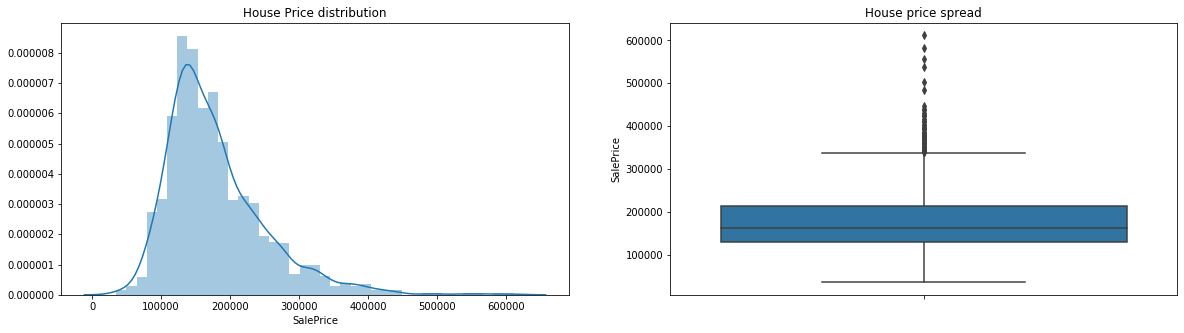

In [110]:
# Distribution of target variable "SalePrice"
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('House Price distribution')
sns.distplot(df['SalePrice'])

plt.subplot(122)
plt.title('House price spread')
sns.boxplot(df['SalePrice'], orient='v')
plt.show()

In [111]:
df['SalePrice'].describe(percentiles = [0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99])

count      1383.000000
mean     178977.106291
std       71837.002809
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      213000.000000
80%      228500.000000
85%      247573.400000
90%      274640.000000
95%      318906.100000
99%      410450.000000
max      611657.000000
Name: SalePrice, dtype: float64

### Inferences:
1. House price distribution is right skewed with high difference in mean and median price
2. Almost 90% of the houses have price below 275,000 and highest price being around 600,000 which clearly indicates presence of outliers. (also can be seen from the boxplot)
3. The data points are spread far away from the mean value which indicates high variance in house prices

In [112]:
# Numerical variables
num_vars = df.select_dtypes(exclude='object')
num_vars = num_vars.columns.to_list()

# categorical variables
cat_vars = df.select_dtypes(include='object')
cat_vars = cat_vars.columns.to_list()

print('Numerical variables are:\n{}\n'.format(num_vars))

print('Categorical variables are:\n{}'.format(cat_vars))

Numerical variables are:
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']

Categorical variables are:
['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold', 'SaleType', 'SaleCondition']


### Univariate Analysis
#### Visualizing categorical variables

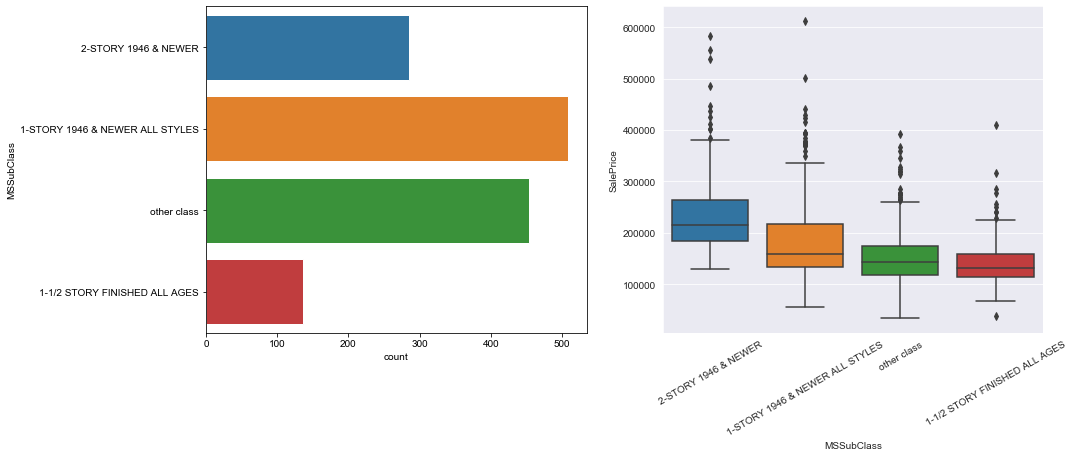

In [113]:
plt.figure(figsize = (15,6))

plt.subplot(121)
sns.set_style('darkgrid')
sns.countplot(y=df['MSSubClass'])

plt.subplot(122)
ax = sns.boxplot(x='MSSubClass',y='SalePrice',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

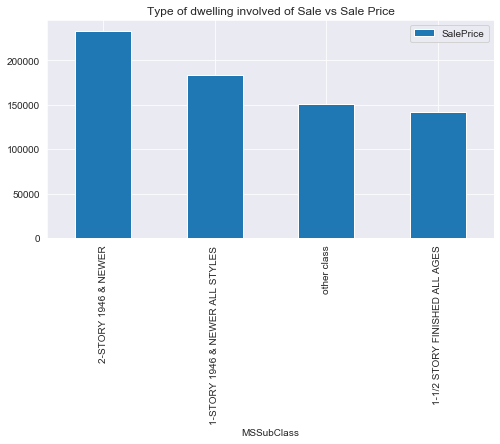

In [114]:
sub_df = pd.DataFrame(df.groupby(['MSSubClass'])['SalePrice'].mean().sort_values(ascending=False))
sub_df.plot.bar(figsize=(8,4))
plt.title('Type of dwelling involved of Sale vs Sale Price')
plt.show()

#### Inferences:
1. Majority of the houses have "1-story 1946 & newer all styles" dwelling type
2. Houses belonging to "2-story 1946 & newer" type of dwelling type have higher average price than rest of the others

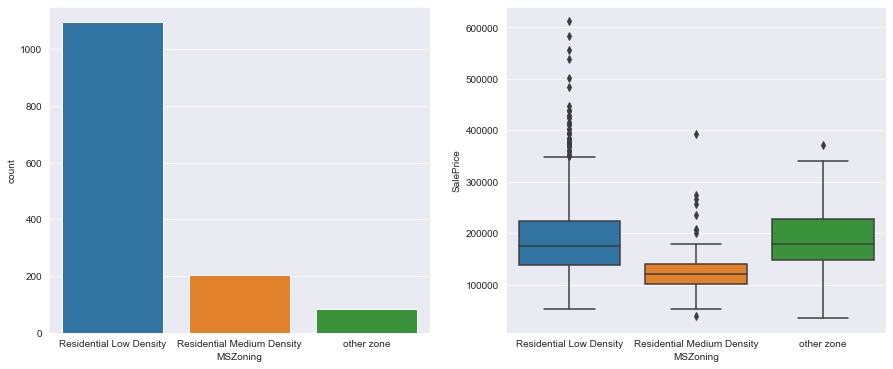

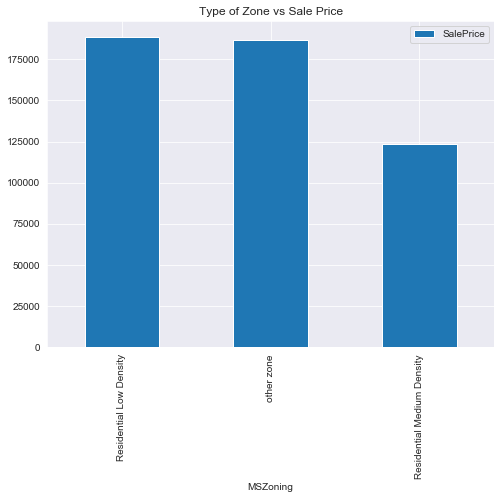

In [115]:
plt.figure(figsize = (15,6))

plt.subplot(121)
sns.countplot(x=df['MSZoning'])

plt.subplot(122)
sns.boxplot(x='MSZoning',y='SalePrice',data=df)
plt.show()

sub_df = pd.DataFrame(df.groupby(['MSZoning'])['SalePrice'].mean().sort_values(ascending=False))
sub_df.plot.bar(figsize=(8,6))
plt.title('Type of Zone vs Sale Price')
plt.show()

#### Inferences:
Residential Low density zoned houses are most common and also they have higher avg selling price than other zoned houses

In [116]:
print(cat_vars)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold', 'SaleType', 'SaleCondition']


In [117]:
def plot_fig(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x + " Histogram")
    plt.xlabel(x)
    sns.countplot(df[x])
    plt.subplot(4,2,(fig+1))
    plt.title(x + ' vs Sale Price')
    sns.boxplot(x = x, y='SalePrice', data=df)
    plt.xlabel(x)

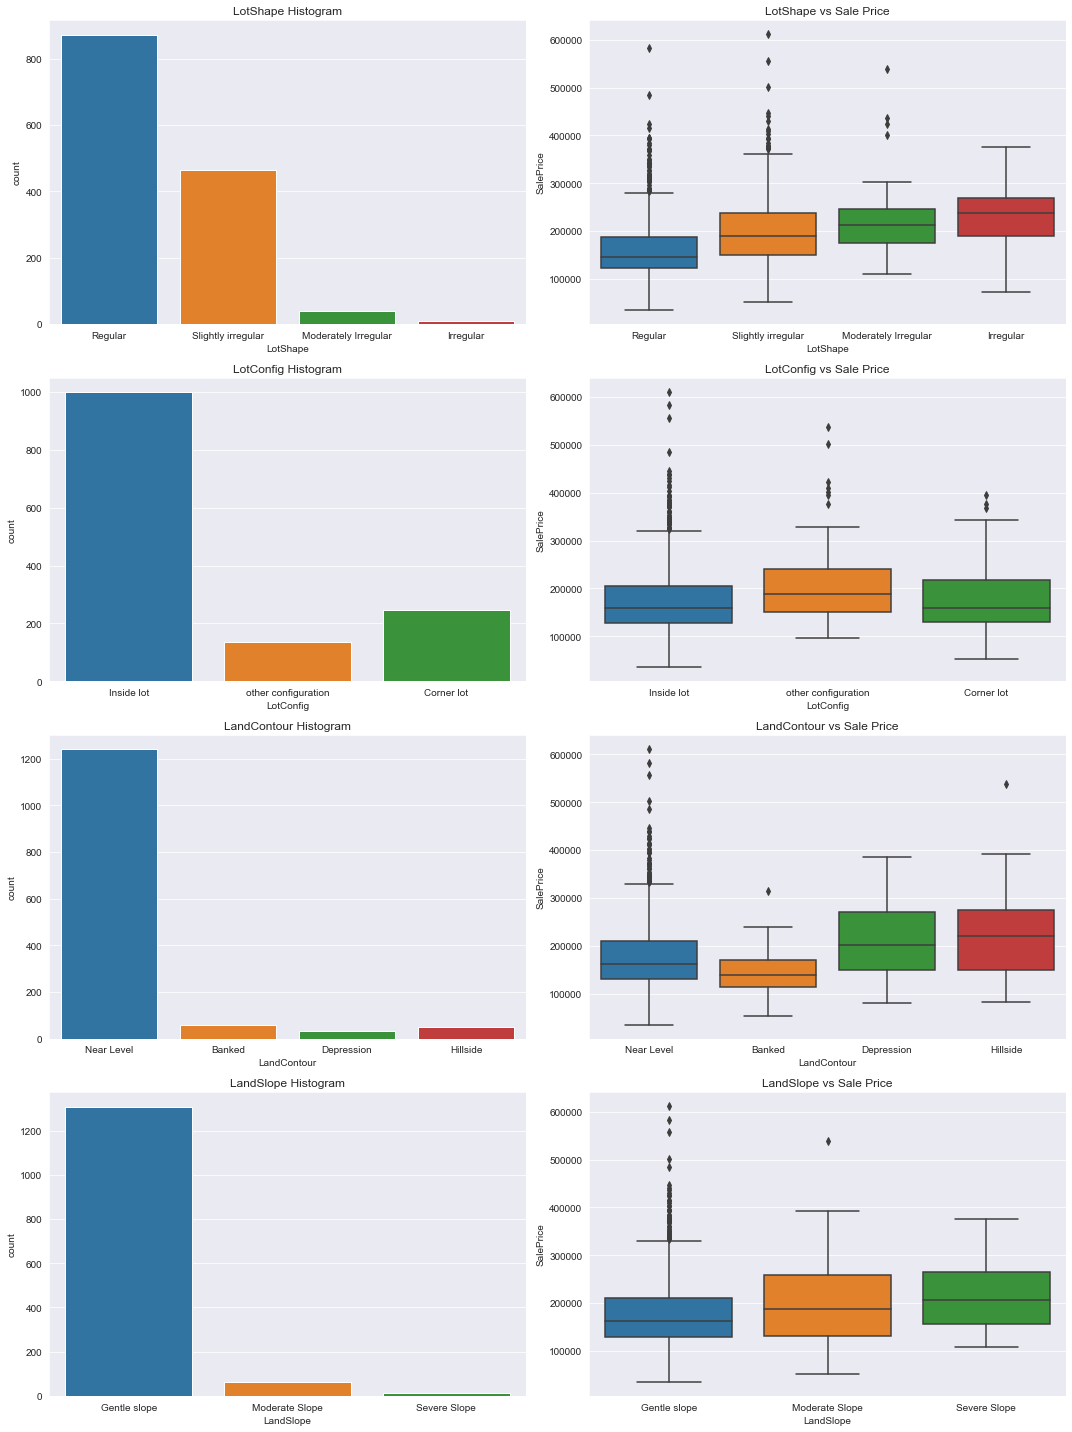

In [118]:
plt.figure(figsize=(15,20))

plot_fig('LotShape',1)
plot_fig('LotConfig',3)
plot_fig('LandContour',5)
plot_fig('LandSlope',7)

plt.tight_layout()

#### Inference:
1. Majority of the houses are on gentle slope but houses which are in hilly areas i.e which have severe slope are more expensive than other types 
2. Most of the houses have regular lot shape and houses which have irregular lot shape are more expensive
3. Inside and corner lot are the most preferred configurations for houses and they almost have similar average price while other lot configuration have higher avg price
4. Most of the houses are on the plateau while very few are present on riverside or hilly areas

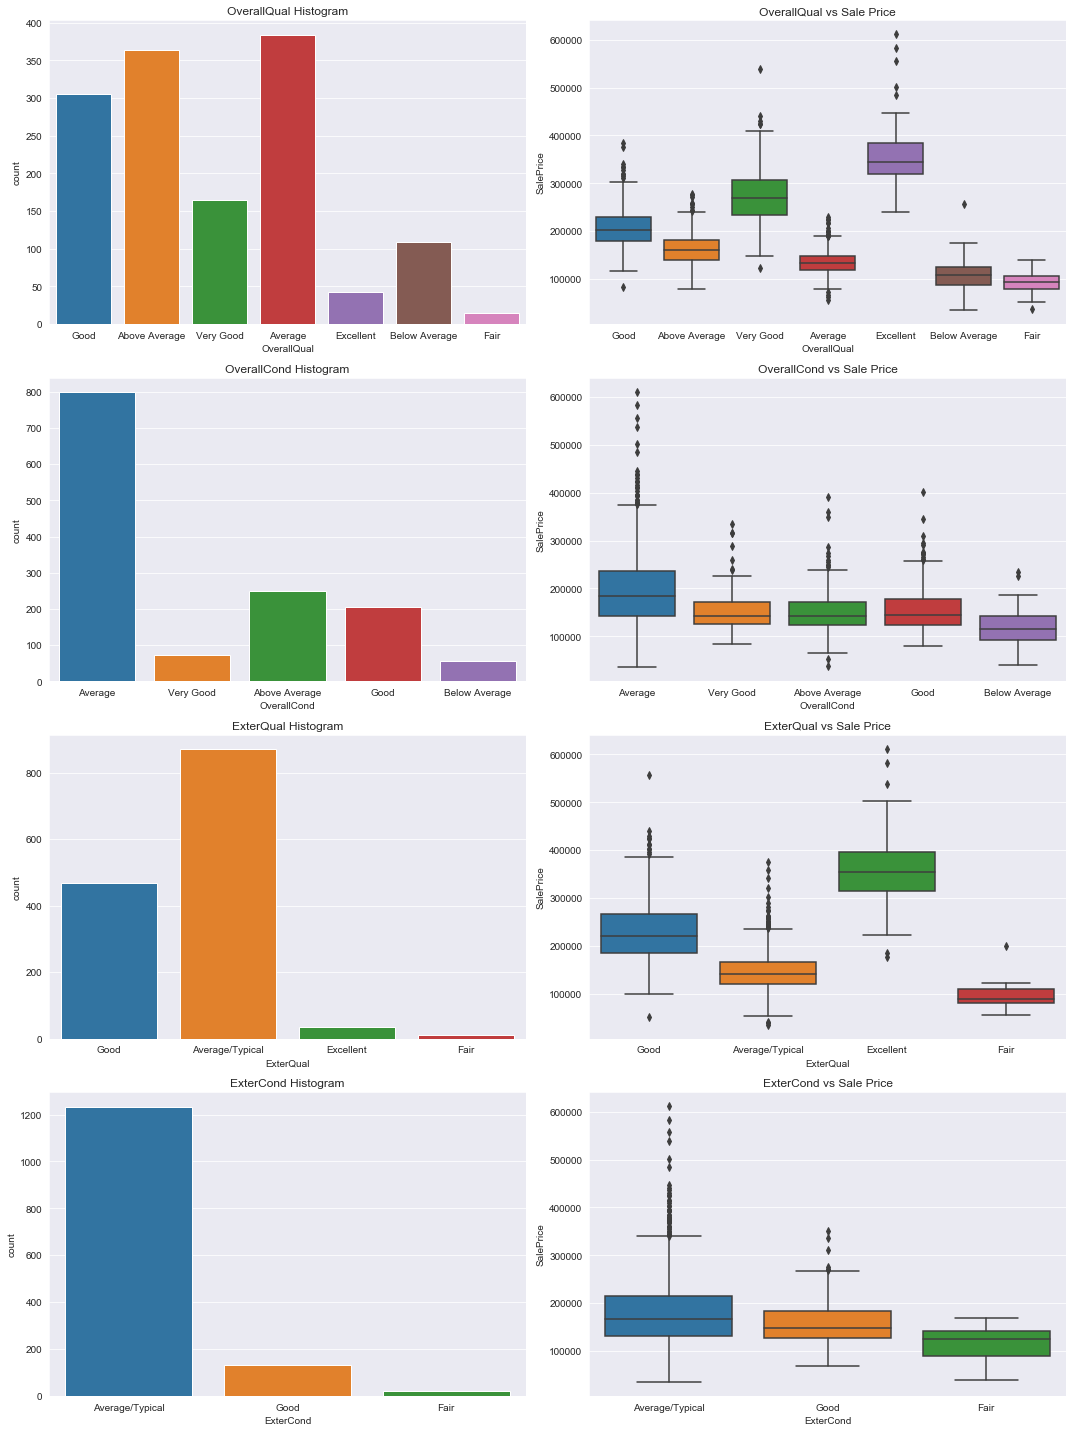

In [119]:
plt.figure(figsize=(15,20))

plot_fig('OverallQual',1)
plot_fig('OverallCond',3)
plot_fig('ExterQual',5)
plot_fig('ExterCond',7)

plt.tight_layout()

#### Inferences:
1. Most of the houses rated as 'average' with respect to their present condition of material on exterior and their cost is also higher
2. Similarly, quality of material on exterior of most of the houses is "average/typical" while the houses having excellent quality of exterior material are costlier
3. Most of the houses have average overall condition and material quality. Houses having excellent material quality are more expensive than the others

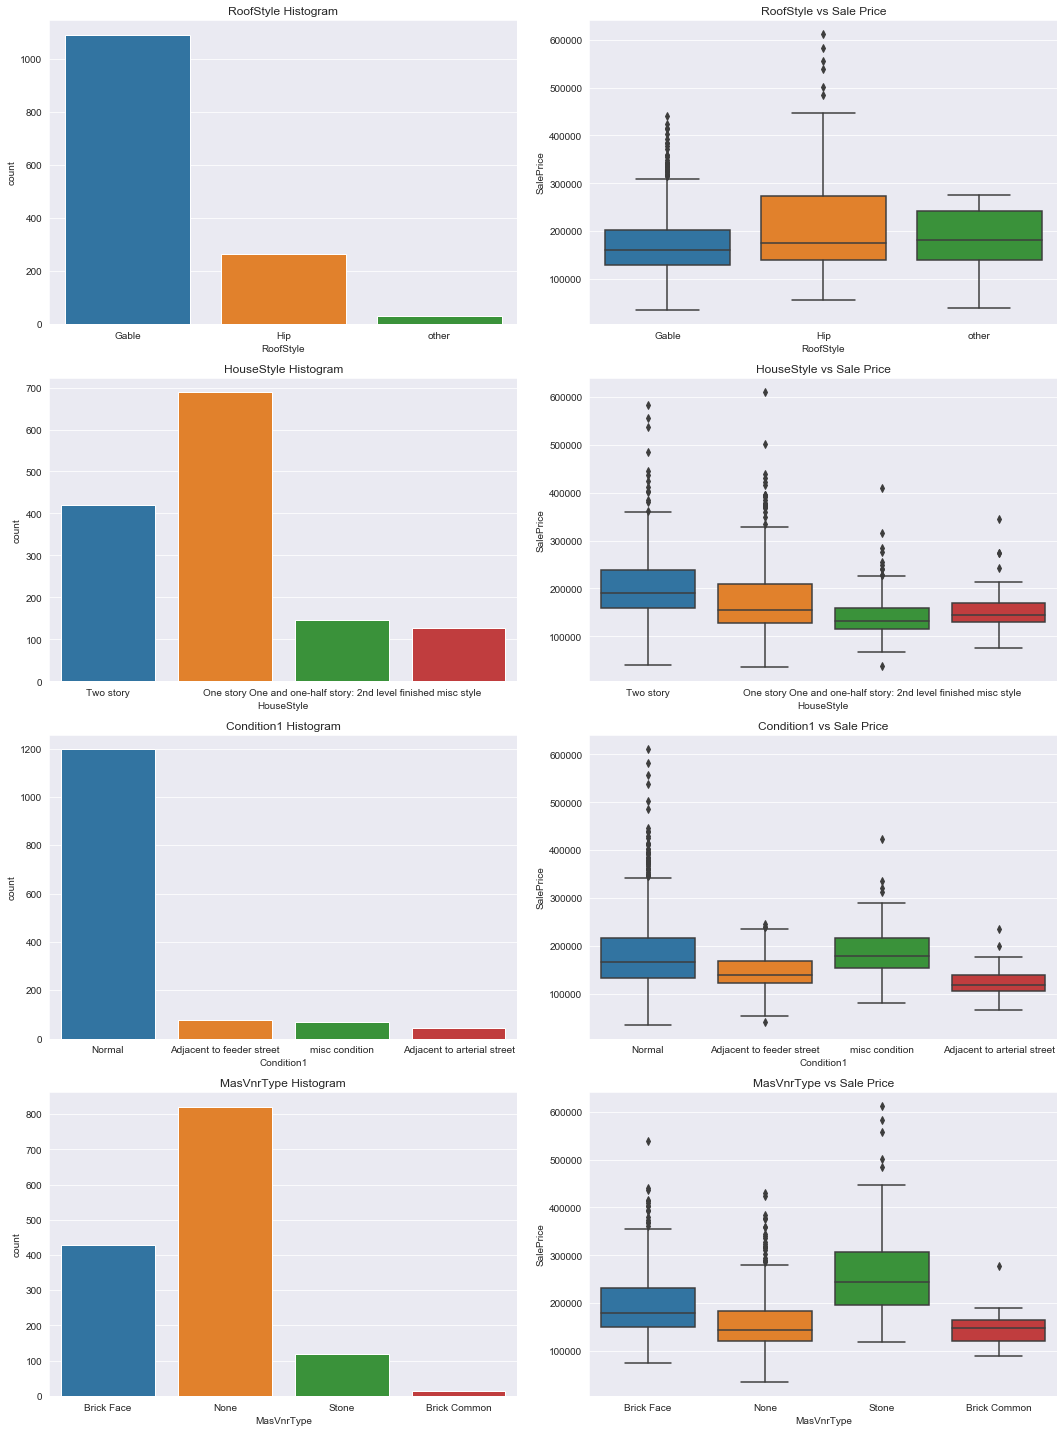

In [120]:
plt.figure(figsize=(15,20))

plot_fig('RoofStyle',1)
plot_fig('HouseStyle',3)
plot_fig('Condition1',5)
plot_fig('MasVnrType',7)

plt.tight_layout()

#### Inferences:
1. Stone masonry houses are most expensive among other kinds of houses
2. "Gable" is the most common roof type among houses while houses having roof type other than 'Gable' or 'Hip' being more expensive
3. Most houses are single storied while 2 storied houses are more expensive

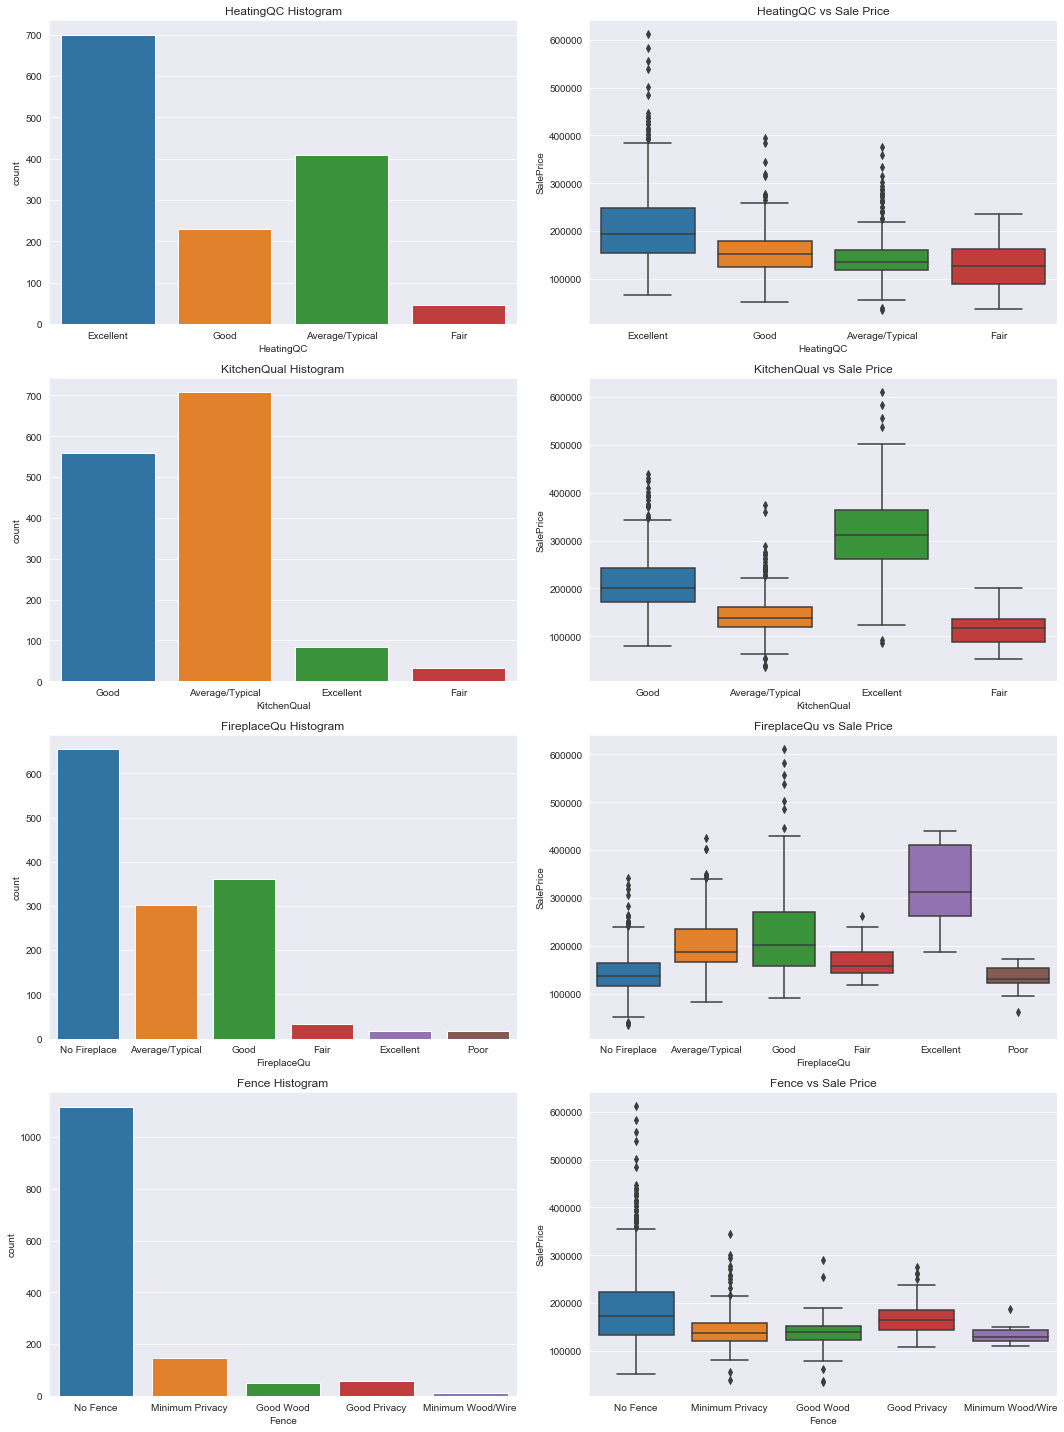

In [121]:
plt.figure(figsize=(15,20))

plot_fig('HeatingQC',1)
plot_fig('KitchenQual',3)
plot_fig('FireplaceQu',5)
plot_fig('Fence',7)

plt.tight_layout()

#### Inferences:
1. Majority of houses do not have fence around them and house with good fence quality are more expensive
2. Most houses don't have fireplaces and houses having excellent fireplaces are the expensive ones
3. Majority of the houses have excellent heating quality and henceforth they have higher avg price then houses having inferior heating quality
4. Kitchen quality is average for most houses and houses having excellent kitchen quality are expensive

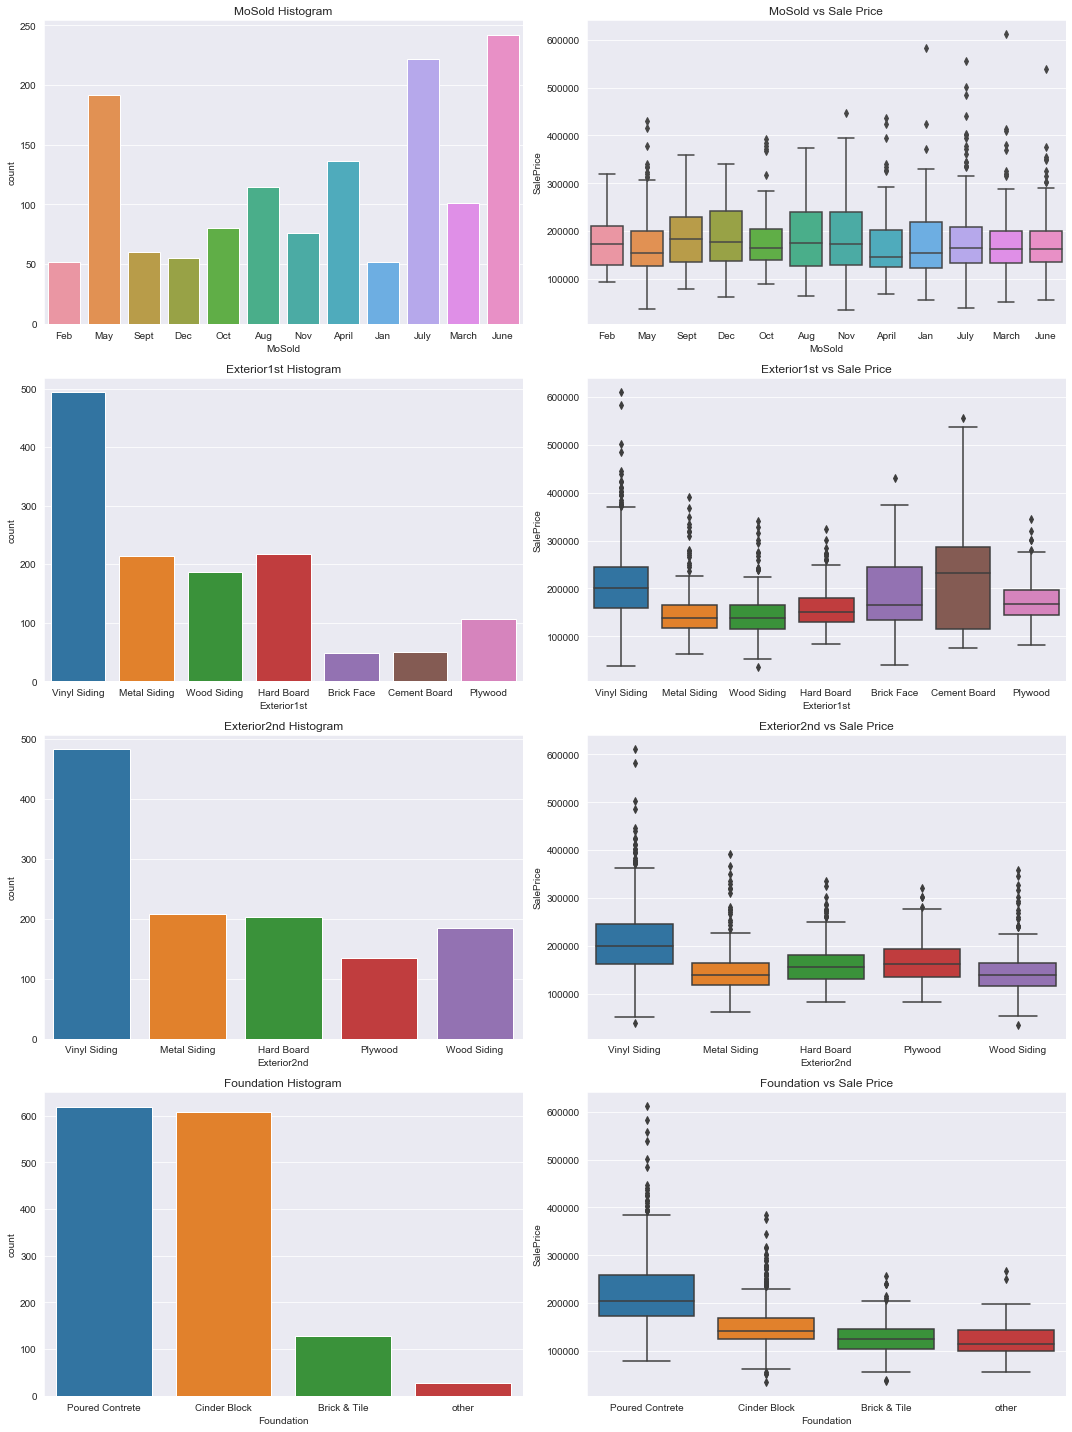

In [122]:
plt.figure(figsize=(15,20))

plot_fig('MoSold',1)
plot_fig('Exterior1st',3)
plot_fig('Exterior2nd',5)
plot_fig('Foundation',7)

plt.tight_layout()

#### Inferences:
1. Most common foundation types are "Poured Concrete" and "Cinder Block" while houses having earlier type of foundation are most expensive
2. Selling price is almost comparable in all the months in which they are sold but the no of houses sold in June are highest followed by houses sold in July
3. Majority of the houses have "Vinyl Siding" as their external covering and most expensive houses will have "Cement Board" as their external covering material
4. If more than one materials are used for external covering then houses having "Vinyl Siding" external material are the expensive ones

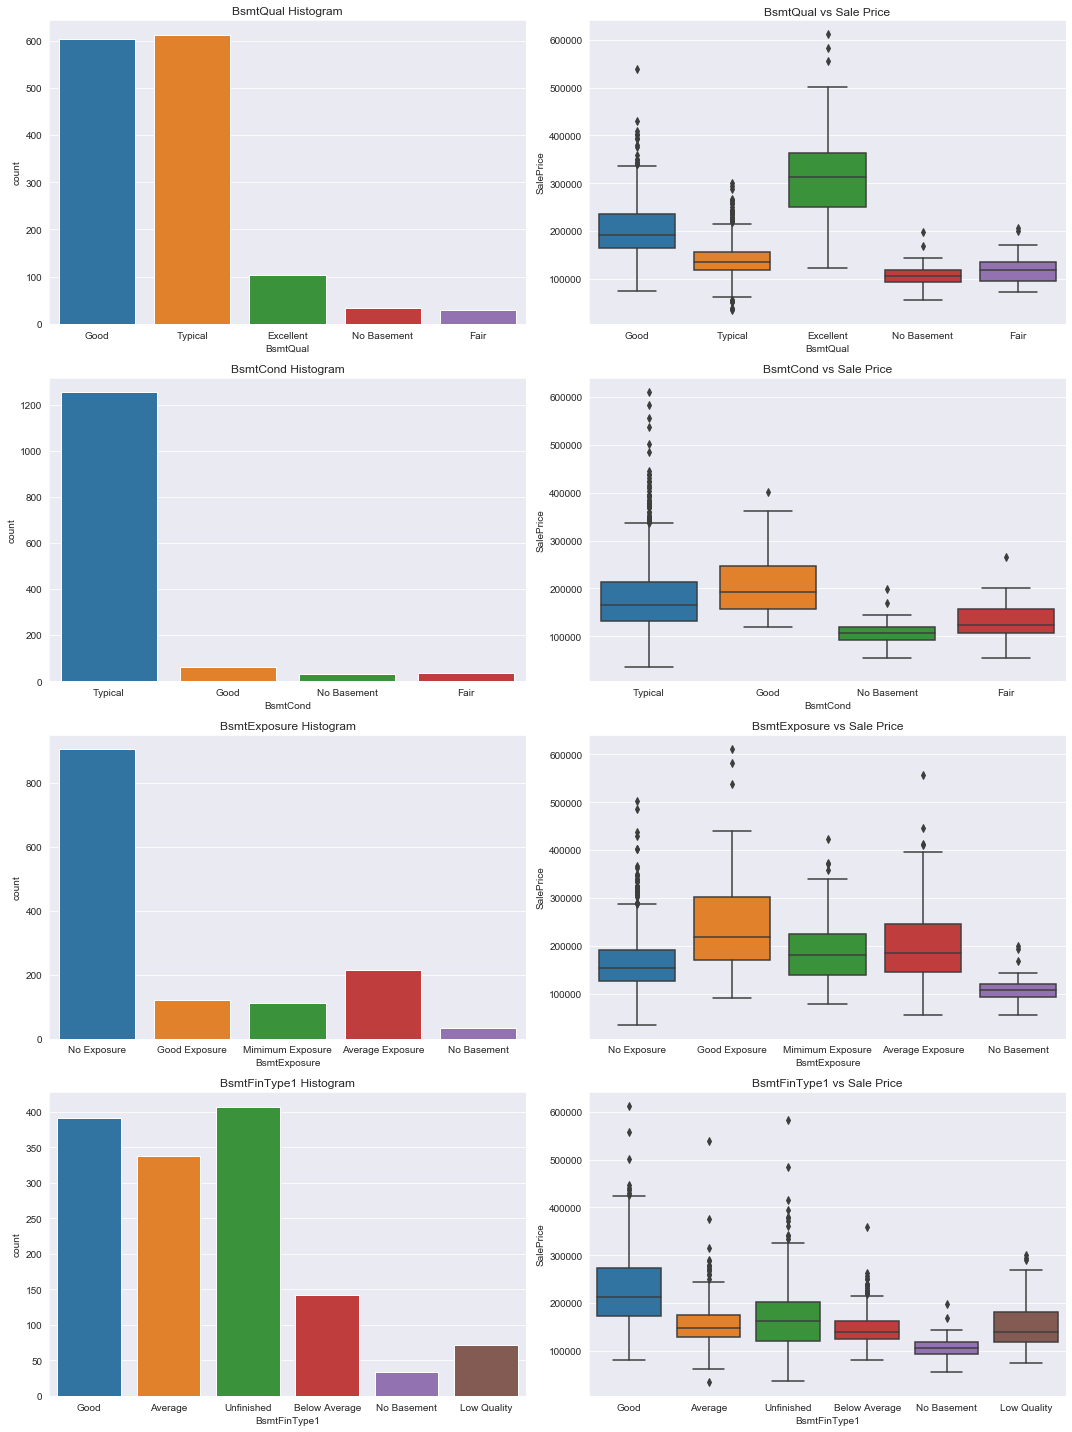

In [123]:
plt.figure(figsize=(15,20))

plot_fig('BsmtQual',1)
plot_fig('BsmtCond',3)
plot_fig('BsmtExposure',5)
plot_fig('BsmtFinType1',7)

plt.tight_layout()

#### Inferences:
1. Most of the houses have typical basement quality and condition
2. Houses having good basement quality are most expensive while houses which don't have basement being least expensive
3. Most houses don't have basement exposure i.e they don't have walkout or garden walls and the houses which have good exposure, are the expensive ones and without basement houses being least expensive

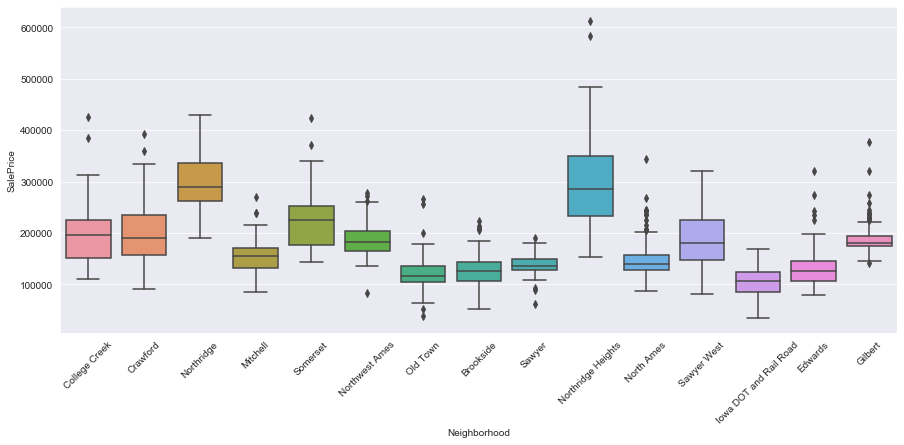

In [124]:
plt.figure(figsize = (15,6))

ax = sns.boxplot(x='Neighborhood',y='SalePrice',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

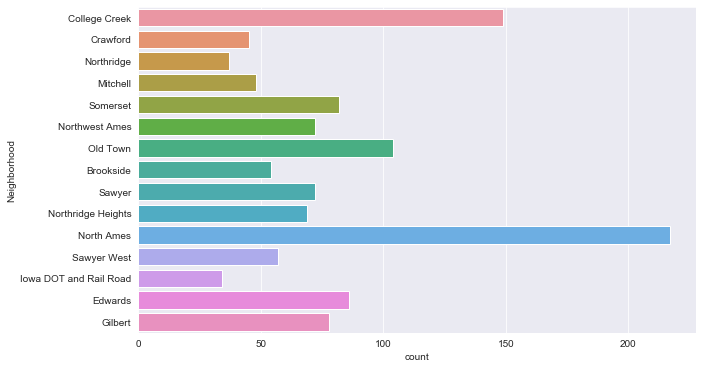

In [125]:
plt.figure(figsize = (10,6))
sns.countplot(y = df['Neighborhood'])
plt.show()

#### Inference:
1. Most of the houses belong to "New Ames" neighborhood which makes this area heavily crowded
2. Houses present in "Northridge" area are the most expensive while houses belonging to "IOWA Dot and Rail Road" locality are the least expensive

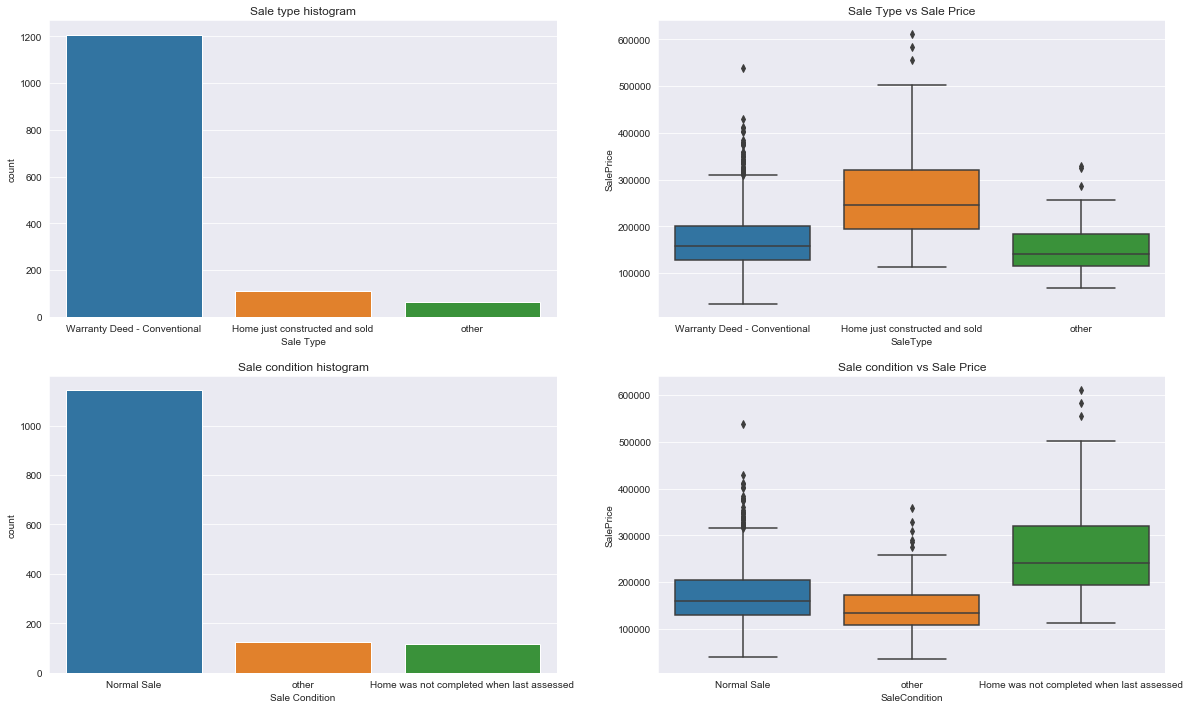

In [126]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title('Sale type histogram')
sns.countplot(df['SaleType'])
plt.xlabel('Sale Type')
plt.subplot(222)
plt.title('Sale Type vs Sale Price')
sns.boxplot(x='SaleType',y='SalePrice',data=df)
plt.subplot(223)
plt.title('Sale condition histogram')
sns.countplot(df['SaleCondition'])
plt.xlabel('Sale Condition')
plt.subplot(224)
plt.title('Sale condition vs Sale Price')
sns.boxplot(x='SaleCondition',y='SalePrice',data=df)
plt.show()

#### Inferences:
1. Most of the houses sold by normal sale while houses which are sold before their completion were sold by much greater amount as compared to other sale conditions
2. Most houses were sold by "Warrenty Deed - Conventional" sale type but when the newly built house was sold, it got the highest price as compared to other sale types

### Visualizing numerical variables

In [127]:
print(num_vars)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']


In [128]:
# converting some variables as integer type
df['BsmtFullBath'] = df['BsmtFullBath'].astype('int')
df['FullBath'] = df['FullBath'].astype('int')
df['HalfBath'] = df['HalfBath'].astype('int')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('int')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('int')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('int')
df['Fireplaces'] = df['Fireplaces'].astype('int')
df['GarageCars'] = df['GarageCars'].astype('int')
df['YrSold'] = df['YrSold'].astype('int')
df['GarageYrBlt'] = df['GarageYrBlt'].astype('int')

In [129]:
def scatter(x, fig):
    plt.subplot(3,2,fig)
    plt.scatter(x = x, y='SalePrice', data=df)
    plt.title(x + ' vs Sale Price')
    plt.xlabel(x)
    plt.ylabel('Sale Price')

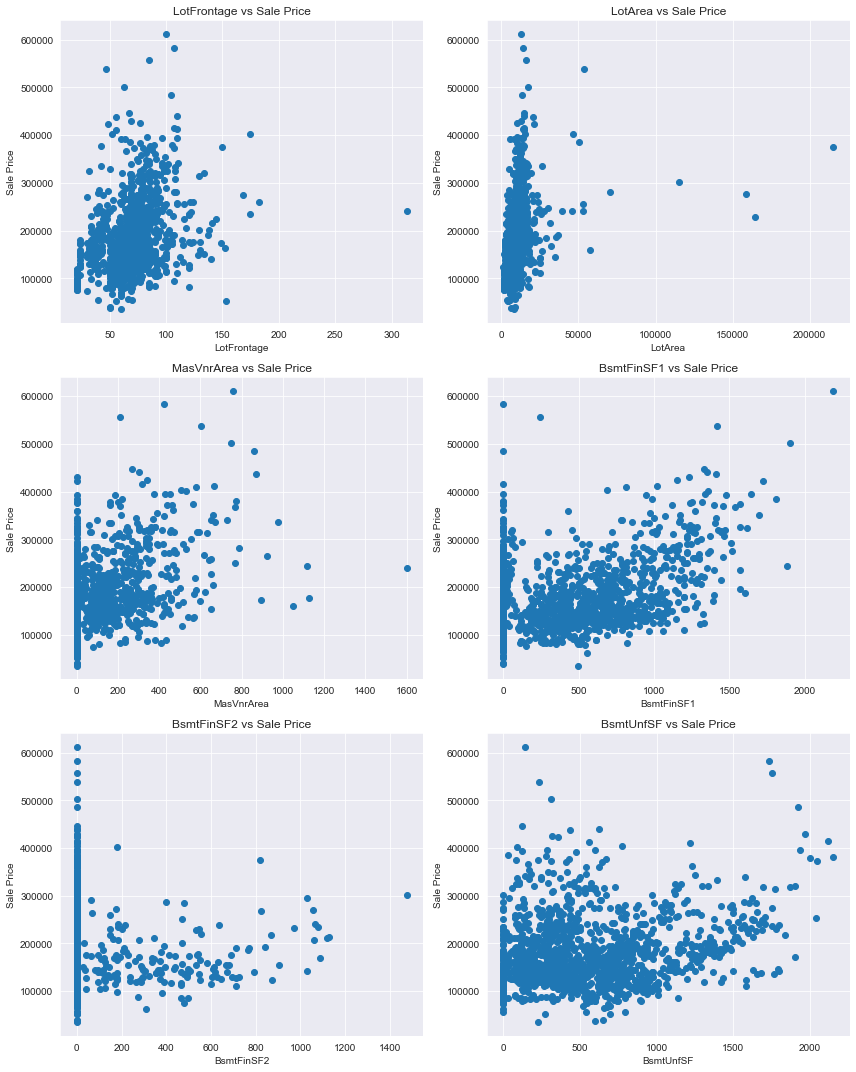

In [130]:
plt.figure(figsize=(12,15))

scatter('LotFrontage',1)
scatter('LotArea',2)
scatter('MasVnrArea',3)
scatter('BsmtFinSF1',4)
scatter('BsmtFinSF2',5)
scatter('BsmtUnfSF',6)

plt.tight_layout()

#### Inferences:
1. As lot frontage area increases the house price will increase while there is huge increment in house price per unit increase in lot area of the house
2. Most of the houses don't have masonry veneer and houses which have veneer, the house sale price is not strongly related with masonry veneer area
3. As basement finished area increases, selling price of house also increases though the increase is slow paced
4. Type 2 finished surface area and unfinished basement area show no relation with sale price

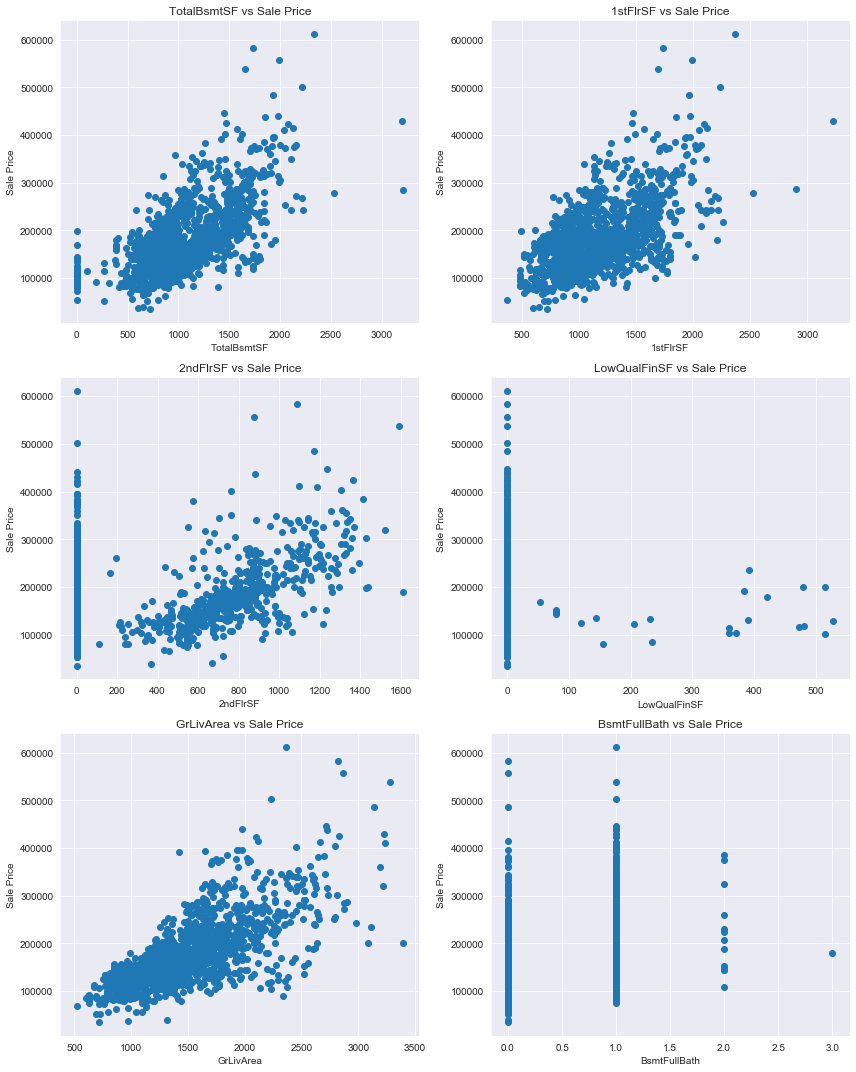

In [131]:
plt.figure(figsize=(12,15))

scatter('TotalBsmtSF',1)
scatter('1stFlrSF',2)
scatter('2ndFlrSF',3)
scatter('LowQualFinSF',4)
scatter('GrLivArea',5)
scatter('BsmtFullBath',6)

plt.tight_layout()

#### Inferences:
1. Total basement area, 1st and 2nd floor surface area show linear positive relation wrt the sale price
2. Low quality finished surface area shows no relation with sale price
3. Also, as the above ground living area increses, the selling price of house also increases linearly
4. Most of the houses have either no basement full bathrooms or 1 full basement bathroom and they don't show significant relation with the selling price of house

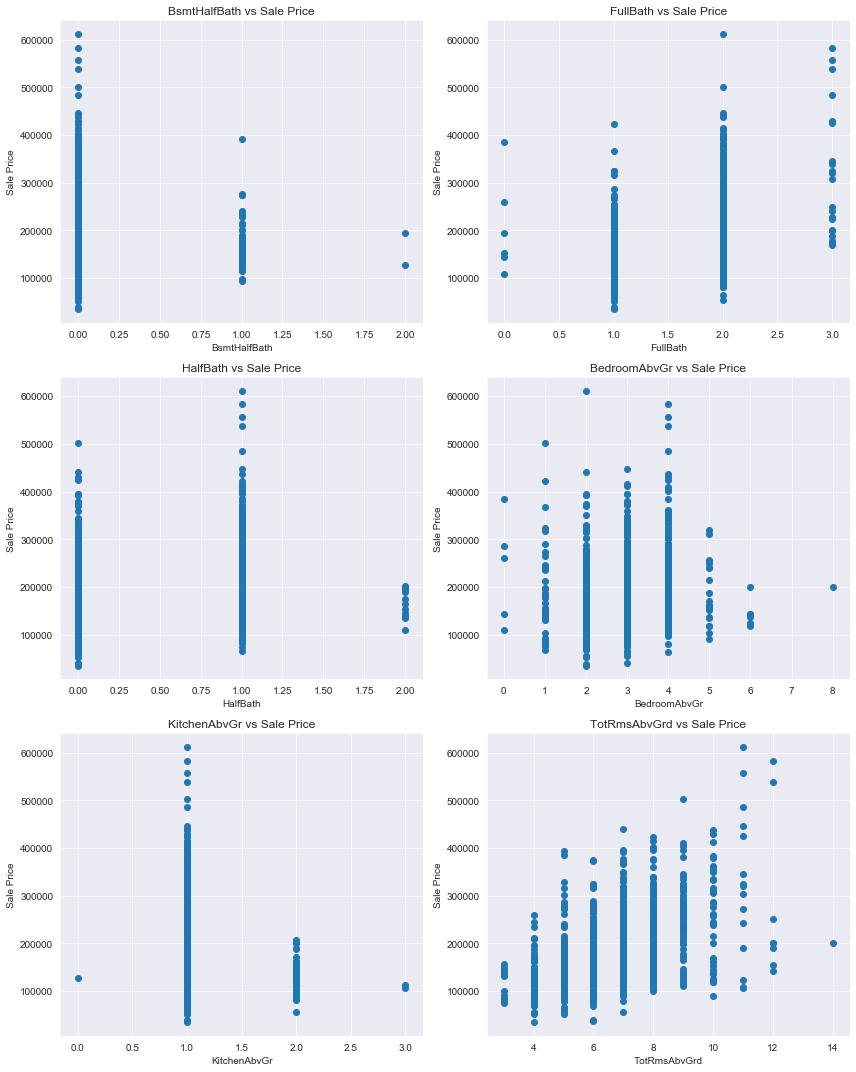

In [132]:
plt.figure(figsize=(12,15))

scatter('BsmtHalfBath',1)
scatter('FullBath',2)
scatter('HalfBath',3)
scatter('BedroomAbvGr',4)
scatter('KitchenAbvGr',5)
scatter('TotRmsAbvGrd',6)

plt.tight_layout()

#### Inferences:
1. Majority of the houses don't have basement half bathrooms and presence of half bathrooms is not well related with sale price
2. Similarly, full bathrooms, bedrooms above ground and kitchens above ground do not show significant relationship with the sale price i.e they are not correlated
3. When total rooms above ground increases, the increase in the sale price of the house can be observed

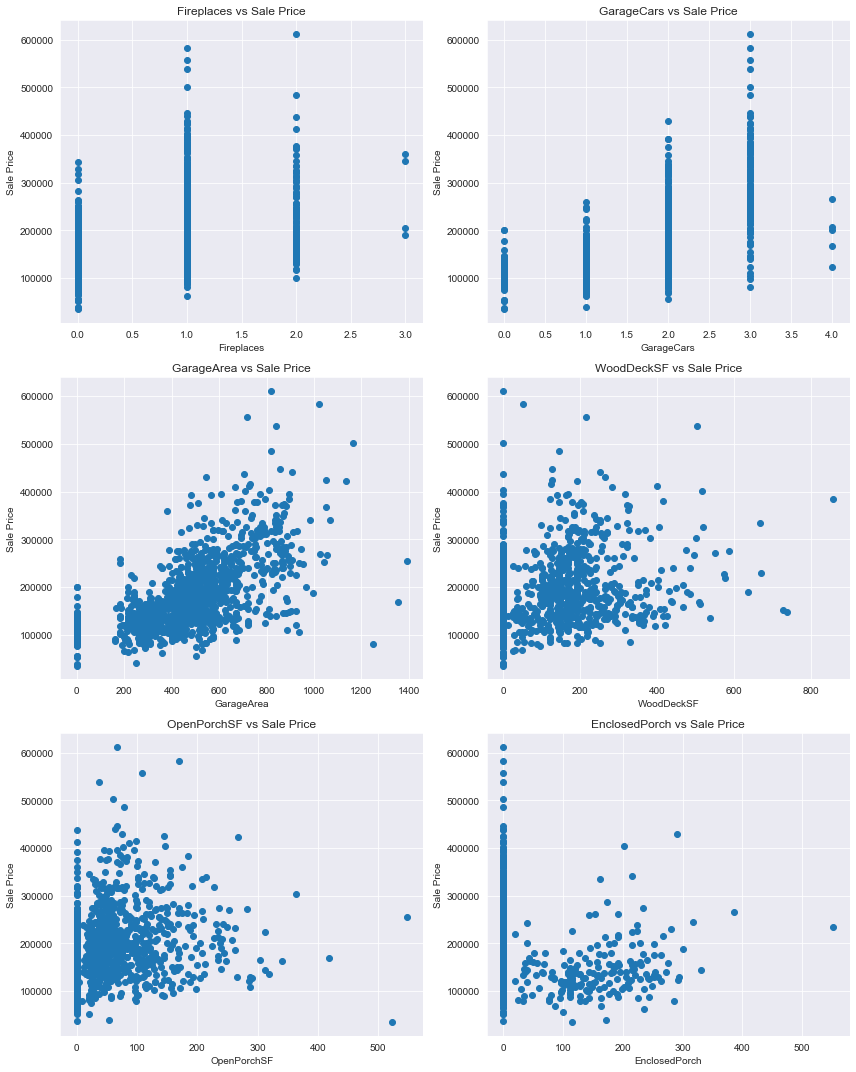

In [133]:
plt.figure(figsize=(12,15))

scatter('Fireplaces',1)
scatter('GarageCars',2)
scatter('GarageArea',3)
scatter('WoodDeckSF',4)
scatter('OpenPorchSF',5)
scatter('EnclosedPorch',6)

plt.tight_layout()

#### Inferences:
1. No of fireplaces do not show significant relation with the sale price
2. As the garage capacity or area increases, the house price is increased
3. Most houses do not have wood deck and as wood deck surface area increases there is slight increase in house price

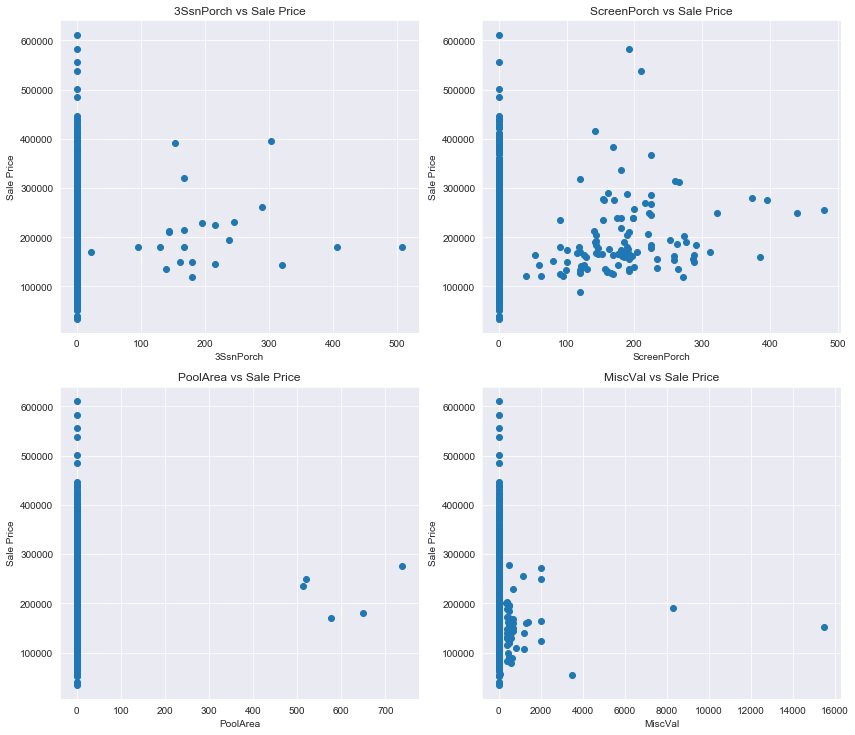

In [134]:
plt.figure(figsize=(12,15))

scatter('3SsnPorch',1)
scatter('ScreenPorch',2)
scatter('PoolArea',3)
scatter('MiscVal',4)

plt.tight_layout()

#### Inferences:
- 3 seasoned porch area as well as screen porch area are not correlated with the sale price
- Most houses dont have pool and misc features and they are not well releated with the sale price

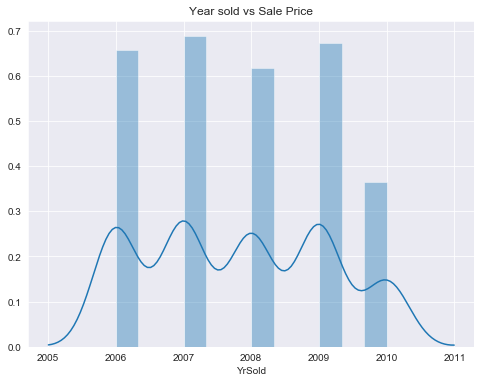

In [135]:
plt.figure(figsize = (8,6))
plt.title('Year sold vs Sale Price')
plt.xlabel('Year')
sns.distplot(df['YrSold'])
plt.show()

#### Inference:
- Houses are sold uniformly i.e they are not biased toward particular year. All the years have almost same sale of houses except 2010

In [136]:
type(cat_vars)

list

## Dummy Variables

In [138]:
# creating dummy for categorical variables
df_cat = df[cat_vars]

df_dummies = pd.get_dummies(df_cat, drop_first=True)

# drop the categorical variables
df = df.drop(cat_vars, axis=1)

# concatenate the dummy variables to the original dataset
df = pd.concat([df, df_dummies], axis=1)

# splitting into train and test
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [139]:
# scaling the dataset
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [140]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [141]:
X_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_other class,MSZoning_Residential Medium Density,MSZoning_other zone,Alley_No alley access,Alley_Paved,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Level,LotConfig_Inside lot,LotConfig_other configuration,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_Northridge,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Condition1_Adjacent to feeder street,Condition1_Normal,Condition1_misc condition,BldgType_Townhouse End Unit,HouseStyle_One story,HouseStyle_Two story,HouseStyle_misc style,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Very Good,OverallCond_Average,OverallCond_Below Average,OverallCond_Good,OverallCond_Very Good,RoofStyle_Hip,RoofStyle_other,Exterior1st_Cement Board,Exterior1st_Hard Board,Exterior1st_Metal Siding,Exterior1st_Plywood,Exterior1st_Vinyl Siding,Exterior1st_Wood Siding,Exterior2nd_Metal Siding,Exterior2nd_Plywood,Exterior2nd_Vinyl Siding,Exterior2nd_Wood Siding,MasVnrType_Brick Face,MasVnrType_None,MasVnrType_Stone,ExterQual_Excellent,ExterQual_Fair,ExterQual_Good,ExterCond_Fair,ExterCond_Good,Foundation_Cinder Block,Foundation_Poured Contrete,Foundation_other,BsmtQual_Fair,BsmtQual_Good,BsmtQual_No Basement,BsmtQual_Typical,BsmtCond_Good,BsmtCond_No Basement,BsmtCond_Typical,BsmtExposure_Good Exposure,BsmtExposure_Mimimum Exposure,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_Below Average,BsmtFinType1_Good,BsmtFinType1_Low Quality,BsmtFinType1_No Basement,BsmtFinType1_Unfinished,HeatingQC_Excellent,HeatingQC_Fair,HeatingQC_Good,KitchenQual_Excellent,KitchenQual_Fair,KitchenQual_Good,FireplaceQu_Excellent,FireplaceQu_Fair,FireplaceQu_Good,FireplaceQu_No Fireplace,FireplaceQu_Poor,GarageType_Built-In,GarageType_Detached from home,GarageType_No Garage,GarageType_other,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_Unfinished,Fence_Good Wood,Fence_Minimum Privacy,Fence_Minimum Wood/Wire,Fence_No Fence,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sept,SaleType_Warranty Deed - Conventional,SaleType_other,SaleCondition_Normal Sale,SaleCondition_other
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.00000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.00000,968.000000,968.000000,968.000000,968.000000,968.0

In [142]:
y_train.describe()

count    968.000000
mean       0.265121
std        0.131290
min        0.000000
25%        0.175354
50%        0.236665
75%        0.327033
max        1.000000
Name: SalePrice, dtype: float64

In [143]:
X_test.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_other class,MSZoning_Residential Medium Density,MSZoning_other zone,Alley_No alley access,Alley_Paved,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LandContour_Depression,LandContour_Hillside,LandContour_Near Level,LotConfig_Inside lot,LotConfig_other configuration,LandSlope_Moderate Slope,LandSlope_Severe Slope,Neighborhood_College Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Iowa DOT and Rail Road,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_Northridge,Neighborhood_Northridge Heights,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Neighborhood_Sawyer West,Neighborhood_Somerset,Condition1_Adjacent to feeder street,Condition1_Normal,Condition1_misc condition,BldgType_Townhouse End Unit,HouseStyle_One story,HouseStyle_Two story,HouseStyle_misc style,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Very Good,OverallCond_Average,OverallCond_Below Average,OverallCond_Good,OverallCond_Very Good,RoofStyle_Hip,RoofStyle_other,Exterior1st_Cement Board,Exterior1st_Hard Board,Exterior1st_Metal Siding,Exterior1st_Plywood,Exterior1st_Vinyl Siding,Exterior1st_Wood Siding,Exterior2nd_Metal Siding,Exterior2nd_Plywood,Exterior2nd_Vinyl Siding,Exterior2nd_Wood Siding,MasVnrType_Brick Face,MasVnrType_None,MasVnrType_Stone,ExterQual_Excellent,ExterQual_Fair,ExterQual_Good,ExterCond_Fair,ExterCond_Good,Foundation_Cinder Block,Foundation_Poured Contrete,Foundation_other,BsmtQual_Fair,BsmtQual_Good,BsmtQual_No Basement,BsmtQual_Typical,BsmtCond_Good,BsmtCond_No Basement,BsmtCond_Typical,BsmtExposure_Good Exposure,BsmtExposure_Mimimum Exposure,BsmtExposure_No Basement,BsmtExposure_No Exposure,BsmtFinType1_Below Average,BsmtFinType1_Good,BsmtFinType1_Low Quality,BsmtFinType1_No Basement,BsmtFinType1_Unfinished,HeatingQC_Excellent,HeatingQC_Fair,HeatingQC_Good,KitchenQual_Excellent,KitchenQual_Fair,KitchenQual_Good,FireplaceQu_Excellent,FireplaceQu_Fair,FireplaceQu_Good,FireplaceQu_No Fireplace,FireplaceQu_Poor,GarageType_Built-In,GarageType_Detached from home,GarageType_No Garage,GarageType_other,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_Unfinished,Fence_Good Wood,Fence_Minimum Privacy,Fence_Minimum Wood/Wire,Fence_No Fence,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sept,SaleType_Warranty Deed - Conventional,SaleType_other,SaleCondition_Normal Sale,SaleCondition_other
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415

In [144]:
# no of features
len(X_train.columns)

157

We have very high no of predictor variables. We will drop some features by doing RFE so as to make our model less complex and then perform Ridge and Lasso regularization if the complexity exists

In [145]:
# Using RFE to eliminate least important features. We will only consider half of the feature by RFE and check whether
# the model is fitting good or do we need regularization

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=80)
rfe = rfe.fit(X_train, y_train)

In [146]:
# listing top 80 features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 29),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 58),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 34),
 ('FullBath', True, 1),
 ('HalfBath', False, 66),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 38),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 2),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 32),
 ('YrSold', False, 65),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 22),
 ('MSSubClass_2-STORY 1946 & NEWER', True, 1),
 ('MSSubClass_other cl

In [147]:
# significant predictors as per RFE
cols = X_train.columns[rfe.support_]
print(len(cols))

80


In [148]:
# checking train accuracy
y_pred_train = rfe.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.931152049041444


In [149]:
# checking test accuracy
y_pred_test = rfe.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.8888250978774891


We observe that, the training and test set accuracy are comparable and there is no big difference between them. This may or may not be overfit.\
So, we again change the train and test dataset keeping train size constant (70%)

In [152]:
# we can shuffle the dataset by changing the random_state value. We consider following random_state values given in list
# and will see how the linear model performs on training and test set
r_state = [1,7,10,20,50,90,100]
for i in r_state:
    # splitting the dataset
    # changing random_state attribute to get different train and test dataset
    df_train, df_test = train_test_split(df, train_size=0.7,
                                    test_size=0.3, random_state=i)
    
    # scaling the dataset
    df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
    df_test[num_vars] = scaler.transform(df_test[num_vars])
    
    # splitting into X and y
    y_train = df_train.pop('SalePrice')
    X_train = df_train
    
    y_test = df_test.pop('SalePrice')
    X_test = df_test
    
    # Using RFE to eliminate least important features. We will only consider half of the feature by RFE and check whether
    # the model is fitting good or do we need regularization
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    rfe = RFE(lm, n_features_to_select=80)
    rfe = rfe.fit(X_train, y_train)
    
    # checking train accuracy
    y_pred_train = rfe.predict(X_train)
    print("Training set accuracy for random_state = {} is {}".format(i, r2_score(y_train, y_pred_train)))
    
    # checking test accuracy
    y_pred_test = rfe.predict(X_test)
    print("Test set accuracy for random_state = {} is {}\n".format(i, r2_score(y_test, y_pred_test)))

Training set accuracy for random_state = 1 is 0.9211196481341531
Test set accuracy for random_state = 1 is 0.9053725151364966

Training set accuracy for random_state = 7 is 0.9297575885822175
Test set accuracy for random_state = 7 is 0.8943588407976234

Training set accuracy for random_state = 10 is 0.9312735824109541
Test set accuracy for random_state = 10 is 0.8894997995852565

Training set accuracy for random_state = 20 is 0.9352534438794156
Test set accuracy for random_state = 20 is 0.8725308006401941

Training set accuracy for random_state = 50 is 0.9279293734850623
Test set accuracy for random_state = 50 is 0.8968919668048887

Training set accuracy for random_state = 90 is 0.9178740842481409
Test set accuracy for random_state = 90 is 0.9183364976932618

Training set accuracy for random_state = 100 is 0.931152049041444
Test set accuracy for random_state = 100 is 0.8888250978774891



Hence, we can proceed with this model having 80 predictor variables. It does not seem to overfit as it is clear from above results of training and test set accuracy.

In [158]:
# Reducing the model to 80 predictor variables
X_train = X_train.loc[:, list(cols)]

In [161]:
X_test = X_test.loc[:, list(cols)]

In [173]:
# Fitting the linear model to find out coefficients and intercept
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

3354319451.9123454
[ 3.85349221e-02  2.44655675e-01  1.01289959e-01  4.81894517e-02
  2.77972754e+11  2.15195294e+11  3.14325283e+11 -3.68489092e+11
 -3.63648538e+10 -2.31923117e+10 -7.60120459e+09  4.01654561e+10
  3.01361084e-02  1.74255371e-02 -7.36780167e-02 -9.02976990e-02
  3.40652466e-02  1.27944946e-02  4.15954590e-02  1.10435486e-02
  1.25122070e-02  1.48620605e-02  3.16390991e-02  3.13701630e-02
  5.92346191e-02  1.71203613e-02 -1.36566162e-02  1.20544434e-02
  1.35574341e-02 -6.81686401e-02  3.54614258e-02 -2.43072510e-02
 -1.63688660e-02 -2.92968750e-02 -2.05993652e-02  2.66494751e-02
 -1.97372437e-02 -1.11274719e-02 -1.61857605e-02  1.43127441e-02
 -1.68151855e-02  1.27868652e-02  1.69067383e-02  1.35738373e-01
 -1.34162903e-02  1.66931152e-02  6.11782074e-02 -1.42517090e-02
 -2.76107788e-02  1.95007324e-02  2.18830109e-02  1.83105469e-02
 -9.51004028e-03 -2.23388672e-02 -1.37481689e-02  1.99966431e-02
  1.48239136e-02  1.99794769e-02  2.52456665e-02  3.44161987e-02
 -2.09

Some coefficients are very large. We will reduce them with Ridge regularization to make the model more generalisable

## Ridge Regularization

In [162]:
from sklearn.linear_model import Ridge, Lasso

In [163]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                  0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                  20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       return_train_score=True,
                       cv=folds,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [164]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [165]:
# Fitting the ridge model for alpha = 2
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)

0.031243823645686702
[ 0.03711805  0.0947537   0.0734566   0.0422227   0.06682398  0.02956273
  0.0338286   0.09652983  0.09010504  0.06872352 -0.01728665  0.11798981
  0.03053735  0.02083508 -0.03478292 -0.06906834  0.03317053  0.02042659
  0.04026129  0.02598431  0.02237475  0.01388551  0.02351767  0.02970375
  0.03815896  0.02055215 -0.01552552  0.01257935  0.01432268 -0.03325729
  0.03329648 -0.02228665 -0.0149277  -0.02573713 -0.01964844  0.03070854
 -0.01733389 -0.01378747 -0.01636317  0.01576175 -0.01545113  0.00696388
  0.00813415  0.12617046 -0.01473994  0.01947171  0.0620747  -0.01358854
 -0.02467214  0.01875243  0.01828511  0.01059618 -0.00936236 -0.01542347
 -0.01357051  0.01386994  0.01211844  0.00786244  0.01181171  0.02123655
 -0.01785917  0.0053595  -0.01336086 -0.02520183 -0.0289334   0.00412474
 -0.03175014  0.00412474  0.02727816 -0.003887    0.00412474  0.03519141
  0.01729709 -0.01939902 -0.00922603 -0.01213466 -0.04177801 -0.04363198
  0.00527607 -0.00805465]


In [185]:
# most significant predictor
coef = ridge.coef_
np.where(coef == max(coef))

(array([43], dtype=int64),)

In [186]:
print('Most significant predictor: {}'.format(X_train.columns[43]))

Most significant predictor: OverallQual_Excellent


In [167]:
# Now calculate accuracy on training set and test set
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.9270331672324013
0.8943950460988789


- For Ridge regularization, alpha value is low which means there is no need for high extent of regularization as it is evident from above results also where we computed train and test scores for different dataset shuffled
- Training accuracy is 92.7% and test accuracy is 89.4% which are comparable
- Model coefficients are very close to zero which means that model is regularized

## Lasso Regularization

In [168]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                  0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                  20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       return_train_score=True,
                       cv=folds,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [169]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [170]:
# Fitting the lasso model for alpha = 0.0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.intercept_)
print(lasso.coef_)

0.04307116554779444
[ 0.01591187  0.17330871  0.08833338  0.03578444  0.03780634  0.
 -0.          0.13164222  0.          0.00416238 -0.02981759  0.26563029
  0.02493546  0.00839534 -0.02566171 -0.07171339  0.          0.01503288
  0.04589915  0.01205581  0.012713    0.00758867  0.01078686  0.0254257
  0.02590927  0.01778547 -0.01490628  0.0054194   0.01199989 -0.0406527
  0.0334209  -0.01823054 -0.01216439 -0.02211014 -0.0161029   0.02556349
 -0.0129545  -0.01100233 -0.0136006   0.01524202 -0.01399212  0.00427955
  0.00693198  0.14211492 -0.00377979  0.0204067   0.06555744 -0.01383505
 -0.02580019  0.01880715  0.01854219  0.00838065 -0.00831052 -0.00118115
 -0.00453164  0.          0.0040014  -0.          0.00307388  0.01177209
 -0.00791354  0.         -0.00092273 -0.01787441 -0.02632404  0.
 -0.0280839   0.          0.02473801  0.          0.          0.03082548
  0.01448242 -0.01884356 -0.00553247 -0.0105613  -0.03745231 -0.03980771
  0.         -0.0125312 ]


In [177]:
count = 0
for i in lasso.coef_:
    if i!=0:
        count+=1
print(count)

68


In [172]:
# Now calculate accuracy on training set and test set
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.92693983253222
0.8957213840092176


- Very low value of alpha(lambda) proves that we don't need high extent of regularization as our model was not showing signs of overfitting
- There are only 12 significant predictors according to the Lasso regularization
- Training accuracy is 92.7% and test accuracy is 89.6% which are comparable

In [183]:
# most significant predictor
coef = lasso.coef_
np.where(coef == max(coef))

(array([11], dtype=int64),)

It means that 12th predictor is most significant since it has highest coefficient

In [184]:
print('Most significant predictor: {}'.format(X_train.columns[11]))

Most significant predictor: GrLivArea


Now doubling the lambdas for ridge and lasso and will see the changes in model
### Ridge regularization

In [187]:
# Fitting the ridge model for alpha = 4
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# most significant predictor
coef = ridge.coef_
np.where(coef == max(coef))

(array([43], dtype=int64),)

In [188]:
print('Most significant predictor: {}'.format(X_train.columns[43]))

Most significant predictor: OverallQual_Excellent


Even if we double the alpha (lambda), we still get "OverallQual_Excellent" as most important predictor

### Lasso regularization

In [189]:
# Fitting the lasso model for alpha = 0.0002
alpha = 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

# most significant predictor
coef = lasso.coef_
np.where(coef == max(coef))

(array([11], dtype=int64),)

In [190]:
print('Most significant predictor: {}'.format(X_train.columns[11]))

Most significant predictor: GrLivArea


Even if we double the alpha (lambda), we still get "GrLivArea" as most important predictor for lasso

Top 5 most important predictors in Lasso:

In [196]:
sorted_coef = sorted(lasso.coef_, reverse=True)
top5 = sorted_coef[:5]
print(top5)

[0.2596627988130743, 0.14694060129692238, 0.1338435522279522, 0.0920288927666321, 0.08077436002805632]


In [198]:
l = [] # list for storing index of most important predictors
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] in top5:
        l.append(i)
print(l)

[1, 2, 7, 11, 43]


In [209]:
# Now removing the top 5 most important predictor variables and rebuild the model
r = set(list(range(80)))
k = set(l)
mylist = list(r.difference(k))

X_train2 = X_train.iloc[:, mylist]
X_test2 = X_test.iloc[:, mylist]
print(len(X_train2.columns))
print(len(X_test2.columns))

75
75


We have removed top 5 variables. Now again build the lasso regression model out of remaining variables

#### Building lasso model again

In [210]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                  0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                  20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       return_train_score=True,
                       cv=folds,
                       verbose=1)

model_cv.fit(X_train2, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [211]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [212]:
# Fitting the lasso model for alpha = 0.0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train2, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [213]:
# Now calculate accuracy on training set and test set
y_pred_train2 = lasso.predict(X_train2)
y_pred_test2 = lasso.predict(X_test2)

print(r2_score(y_train, y_pred_train2))
print(r2_score(y_test, y_pred_test2))

0.9076100521178219
0.8785888325399496


In [215]:
print(lasso.coef_)

[ 0.04089229  0.06006251  0.16308384  0.09222387  0.14010374  0.23807869
  0.13750901 -0.          0.028007    0.0226234  -0.05334763 -0.09712537
  0.02915141  0.01204253  0.06019806  0.01653736  0.03196927 -0.
  0.          0.01528159  0.04482014  0.02659774 -0.02135629  0.0082598
  0.01290731 -0.01748701  0.02413076 -0.02566372 -0.01081965 -0.0268558
 -0.0215382   0.0316128  -0.01882057 -0.02013101 -0.01539066  0.01724981
 -0.00813205  0.00081114  0.00229597 -0.01148572  0.01075955  0.036538
 -0.00849393 -0.0251427   0.01670732  0.01470852  0.00094908 -0.00566626
 -0.         -0.01375101  0.0016603   0.00708459 -0.          0.00443669
  0.01901464 -0.01035849 -0.         -0.00942375 -0.05552602 -0.04582781
 -0.         -0.05812454 -0.          0.03440934 -0.         -0.
  0.06617099  0.02429323 -0.0201764  -0.00576511 -0.00879692 -0.03829751
 -0.0404362   0.00134113 -0.01396316]


In [214]:
# most significant predictor
coef = lasso.coef_
np.where(coef == max(coef))

(array([5], dtype=int64),)

Top 5 most important predictors in Lasso:

In [216]:
sorted_coef2 = sorted(lasso.coef_, reverse=True)
top5 = sorted_coef2[:5]
print(top5)

[0.2380786877843654, 0.16308384016080726, 0.14010373996961312, 0.1375090077679599, 0.09222386859467797]


In [217]:
l = [] # list for storing index of most important predictors in new lasso model
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] in top5:
        l.append(i)
print(l)

[2, 3, 4, 5, 6]


In [219]:
new_cols = X_train2.columns[l]
print(new_cols)

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF'], dtype='object')


In [220]:
X_train2.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_2-STORY 1946 & NEWER,MSZoning_Residential Medium Density,Alley_Paved,LotConfig_other configuration,LandSlope_Severe Slope,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchell,Neighborhood_North Ames,Neighborhood_Northridge,Neighborhood_Northwest Ames,Neighborhood_Old Town,Neighborhood_Sawyer,Condition1_Normal,BldgType_Townhouse End Unit,HouseStyle_One story,HouseStyle_misc style,OverallQual_Fair,OverallQual_Good,OverallQual_Very Good,OverallCond_Average,OverallCond_Below Average,OverallCond_Good,OverallCond_Very Good,RoofStyle_other,Exterior1st_Hard Board,Exterior1st_Vinyl Siding,Exterior1st_Wood Siding,Exterior2nd_Vinyl Siding,Exterior2nd_Wood Siding,MasVnrType_Brick Face,MasVnrType_None,MasVnrType_Stone,ExterQual_Fair,ExterCond_Fair,Foundation_other,BsmtQual_Fair,BsmtQual_Good,BsmtQual_No Basement,BsmtQual_Typical,BsmtCond_No Basement,BsmtExposure_Good Exposure,BsmtExposure_No Basement,BsmtFinType1_No Basement,KitchenQual_Excellent,GarageType_Built-In,GarageType_other,Fence_Good Wood,MoSold_Nov,SaleType_Warranty Deed - Conventional,SaleType_other,SaleCondition_Normal Sale,SaleCondition_other
842,0.208904,0.114375,0.163866,0.365672,0.128193,0.313935,0.000000,0.0,0.333333,0.333333,0.375,0.0,0.272727,0.000000,0.50,0.352518,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1070,0.174658,0.075000,0.307773,0.000000,0.214584,0.267617,0.000000,0.0,0.333333,0.333333,0.375,0.0,0.272727,0.000000,0.25,0.205755,0.0,0.00000,0.0,0.400000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
277,0.407534,0.000000,0.063025,0.000000,0.345564,0.194774,0.000000,0.0,0.000000,0.333333,0.250,0.0,0.090909,0.000000,0.50,0.287770,0.0,0.00000,0.0,0.000000,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
189,0.068493,0.000000,0.605567,0.000000,0.204366,0.483373,0.000000,0.0,0.333333,0.333333,0.000,0.0,0.181818,0.333333,0.50,0.490647,0.0,0.00000,0.0,0.466667,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
108,0.219178,0.000000,0.000000,0.000000,0.368323,0.247427,0.322781,0.0,0.000000,0.666667,0.375,0.0,0.363636,0.000000,0.00,0.000000,0.0,0.26087,0.0,0.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
